In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/lazada/lzdskincare_link.csv")
df.head()

web-scraper-order                           web-scraper-start-url  \
0      1724415552-1  https://www.lazada.co.id/beli-perawatan-kulit/   
1      1724415552-2  https://www.lazada.co.id/beli-perawatan-kulit/   
2      1724415552-3  https://www.lazada.co.id/beli-perawatan-kulit/   
3      1724415552-4  https://www.lazada.co.id/beli-perawatan-kulit/   
4      1724415552-5  https://www.lazada.co.id/beli-perawatan-kulit/   

                                          namaproduk     harga  produkterjual  \
0                  ONLYOU SUNSCREEN SPF50+ PA++ 50gr  Rp52.500    200 Terjual   
1                 DAILY BRIGHTENER ASDERMA AESTHETIC  Rp59.000    187 Terjual   
2  Biore UV Aqua Rich Sunscreen Watery Essence SP...  Rp19.900    500 Terjual   
3  H&H Sunscreen Lightening Pink SPF 30 PA++++ / ...  Rp64.999  11.1K Terjual   
4  TONER SUPER STRONG 60ML UTK MENGHILANGKAN FLEK...  Rp14.900  39.8K Terjual   

  jumlahpenilaian                      promo                daerah  \
0            (43)                        NaN    Kota Jakarta Barat   
1            (75)        Diskon koin Rp1.770    Kota Jakarta Utara   
2           (193)  Hemat  50% dengan voucher           Kab. Bekasi   
3          (4495)        Diskon koin Rp3.900  Kota Jakarta Selatan   
4          (4400)          Diskon koin Rp447           Kota Bekasi   

                                          linkproduk  \
0                  ONLYOU SUNSCREEN SPF50+ PA++ 50gr   
1                 DAILY BRIGHTENER ASDERMA AESTHETIC   
2  Biore UV Aqua Rich Sunscreen Watery Essence SP...   
3  H&H Sunscreen Lightening Pink SPF 30 PA++++ / ...   
4  TONER SUPER STRONG 60ML UTK MENGHILANGKAN FLEK...   

                                     linkproduk-href  
0  https://www.lazada.co.id/products/onlyou-sunsc...  
1  https://www.lazada.co.id/products/daily-bright...  
2  https://www.lazada.co.id/products/biore-uv-aqu...  
3  https://www.lazada.co.id/products/hh-sunscreen...  
4  https://www.lazada.co.id/products/toner-super-...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8560 entries, 0 to 8559
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      8560 non-null   object
 1   web-scraper-start-url  8560 non-null   object
 2   namaproduk             8560 non-null   object
 3   harga                  8560 non-null   object
 4   produkterjual          6116 non-null   object
 5   jumlahpenilaian        6638 non-null   object
 6   promo                  6880 non-null   object
 7   daerah                 8560 non-null   object
 8   linkproduk             8560 non-null   object
 9   linkproduk-href        8560 non-null   object
dtypes: object(10)
memory usage: 668.9+ KB


## Pre Processing

In [4]:
df.drop(columns=['web-scraper-order', 'web-scraper-start-url', 'linkproduk'], inplace=True)
df.head(3)

namaproduk     harga produkterjual  \
0                  ONLYOU SUNSCREEN SPF50+ PA++ 50gr  Rp52.500   200 Terjual   
1                 DAILY BRIGHTENER ASDERMA AESTHETIC  Rp59.000   187 Terjual   
2  Biore UV Aqua Rich Sunscreen Watery Essence SP...  Rp19.900   500 Terjual   

  jumlahpenilaian                      promo              daerah  \
0            (43)                        NaN  Kota Jakarta Barat   
1            (75)        Diskon koin Rp1.770  Kota Jakarta Utara   
2           (193)  Hemat  50% dengan voucher         Kab. Bekasi   

                                     linkproduk-href  
0  https://www.lazada.co.id/products/onlyou-sunsc...  
1  https://www.lazada.co.id/products/daily-bright...  
2  https://www.lazada.co.id/products/biore-uv-aqu...

In [5]:
df.rename(columns={'linkproduk-href': 'linkproduk'}, inplace=True)
df.head()

namaproduk     harga  produkterjual  \
0                  ONLYOU SUNSCREEN SPF50+ PA++ 50gr  Rp52.500    200 Terjual   
1                 DAILY BRIGHTENER ASDERMA AESTHETIC  Rp59.000    187 Terjual   
2  Biore UV Aqua Rich Sunscreen Watery Essence SP...  Rp19.900    500 Terjual   
3  H&H Sunscreen Lightening Pink SPF 30 PA++++ / ...  Rp64.999  11.1K Terjual   
4  TONER SUPER STRONG 60ML UTK MENGHILANGKAN FLEK...  Rp14.900  39.8K Terjual   

  jumlahpenilaian                      promo                daerah  \
0            (43)                        NaN    Kota Jakarta Barat   
1            (75)        Diskon koin Rp1.770    Kota Jakarta Utara   
2           (193)  Hemat  50% dengan voucher           Kab. Bekasi   
3          (4495)        Diskon koin Rp3.900  Kota Jakarta Selatan   
4          (4400)          Diskon koin Rp447           Kota Bekasi   

                                          linkproduk  
0  https://www.lazada.co.id/products/onlyou-sunsc...  
1  https://www.lazada.co.id/products/daily-bright...  
2  https://www.lazada.co.id/products/biore-uv-aqu...  
3  https://www.lazada.co.id/products/hh-sunscreen...  
4  https://www.lazada.co.id/products/toner-super-...

In [6]:
# Fungsi untuk membersihkan promo
def clean_promo(promo):
    if isinstance(promo, str):  # Memastikan promo adalah string
        if 'Hemat' in promo and 'voucher' in promo:
            # Mengubah format promo dengan voucher XX%
            try:
                percentage = promo.split('Hemat ')[1].split(' dengan voucher')[0].strip()
                return f'Voucher {percentage}'
            except IndexError:
                return 'Voucher tidak diketahui'
        elif 'Diskon koin' in promo:
            # Mengubah format promo dengan koin XX
            try:
                amount = promo.split('Diskon koin ')[1].replace('Rp', '').strip()  # Menghapus 'Rp'
                return f'Koin {amount}'
            except IndexError:
                return 'Koin tidak diketahui'
    return 'Tidak Ada'  # Mengembalikan 'Tidak Ada' untuk non-string atau NaN

# Menerapkan fungsi ke kolom 'promo'
df['promo'] = df['promo'].apply(clean_promo)
df[['namaproduk', 'promo']]

namaproduk        promo
0                     ONLYOU SUNSCREEN SPF50+ PA++ 50gr    Tidak Ada
1                    DAILY BRIGHTENER ASDERMA AESTHETIC   Koin 1.770
2     Biore UV Aqua Rich Sunscreen Watery Essence SP...  Voucher 50%
3     H&H Sunscreen Lightening Pink SPF 30 PA++++ / ...   Koin 3.900
4     TONER SUPER STRONG 60ML UTK MENGHILANGKAN FLEK...     Koin 447
...                                                 ...          ...
8555  Beli 1 GRATIS 1 MADAME GIE Protect Me Sunscree...     Koin 675
8556  Sunscreen BBF coklat buat kulit normal harga p...    Tidak Ada
8557                         DERMAPLUS REFRESHING TONER    Tidak Ada
8558  Pond's UV Protect Sun Serum SPF50+ PA++++ 30gr...   Voucher 8%
8559                                   Sunscren BREYLEE   Koin 5.000

[8560 rows x 2 columns]

In [7]:
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.upper()
        # Menghapus teks tambahan sebelum konversi
        value = ''.join(filter(lambda x: x.isdigit() or x in ['K','.'], value))
        if 'K' in value:
            return float(value.replace('K', '').replace(',', '').strip()) * 1000
        else:
            return float(value.replace(',', '').strip())
    return value
    
df['produkterjual'] = df['produkterjual'].apply(convert_to_numeric)
df.head(3)

namaproduk     harga  produkterjual  \
0                  ONLYOU SUNSCREEN SPF50+ PA++ 50gr  Rp52.500          200.0   
1                 DAILY BRIGHTENER ASDERMA AESTHETIC  Rp59.000          187.0   
2  Biore UV Aqua Rich Sunscreen Watery Essence SP...  Rp19.900          500.0   

  jumlahpenilaian        promo              daerah  \
0            (43)    Tidak Ada  Kota Jakarta Barat   
1            (75)   Koin 1.770  Kota Jakarta Utara   
2           (193)  Voucher 50%         Kab. Bekasi   

                                          linkproduk  
0  https://www.lazada.co.id/products/onlyou-sunsc...  
1  https://www.lazada.co.id/products/daily-bright...  
2  https://www.lazada.co.id/products/biore-uv-aqu...

In [8]:
df['harga'] = df['harga'].str.replace('Rp', '').str.replace('.', '').astype(int)
df.head()

namaproduk  harga  produkterjual  \
0                  ONLYOU SUNSCREEN SPF50+ PA++ 50gr  52500          200.0   
1                 DAILY BRIGHTENER ASDERMA AESTHETIC  59000          187.0   
2  Biore UV Aqua Rich Sunscreen Watery Essence SP...  19900          500.0   
3  H&H Sunscreen Lightening Pink SPF 30 PA++++ / ...  64999        11100.0   
4  TONER SUPER STRONG 60ML UTK MENGHILANGKAN FLEK...  14900        39800.0   

  jumlahpenilaian        promo                daerah  \
0            (43)    Tidak Ada    Kota Jakarta Barat   
1            (75)   Koin 1.770    Kota Jakarta Utara   
2           (193)  Voucher 50%           Kab. Bekasi   
3          (4495)   Koin 3.900  Kota Jakarta Selatan   
4          (4400)     Koin 447           Kota Bekasi   

                                          linkproduk  
0  https://www.lazada.co.id/products/onlyou-sunsc...  
1  https://www.lazada.co.id/products/daily-bright...  
2  https://www.lazada.co.id/products/biore-uv-aqu...  
3  https://www.lazada.co.id/products/hh-sunscreen...  
4  https://www.lazada.co.id/products/toner-super-...

In [9]:
# Menghapus tanda kurung dan mengubah tipe df menjadi integer
df['jumlahpenilaian'] = df['jumlahpenilaian'].str.replace('[()]', '', regex=True)
df.head(3)

namaproduk  harga  produkterjual  \
0                  ONLYOU SUNSCREEN SPF50+ PA++ 50gr  52500          200.0   
1                 DAILY BRIGHTENER ASDERMA AESTHETIC  59000          187.0   
2  Biore UV Aqua Rich Sunscreen Watery Essence SP...  19900          500.0   

  jumlahpenilaian        promo              daerah  \
0              43    Tidak Ada  Kota Jakarta Barat   
1              75   Koin 1.770  Kota Jakarta Utara   
2             193  Voucher 50%         Kab. Bekasi   

                                          linkproduk  
0  https://www.lazada.co.id/products/onlyou-sunsc...  
1  https://www.lazada.co.id/products/daily-bright...  
2  https://www.lazada.co.id/products/biore-uv-aqu...

In [10]:
# Mengganti nilai NaN pada kolom `produkterjual` dan `jumlahpenilaian` dengan 0
df['produkterjual'] = df['produkterjual'].fillna(0)
df['jumlahpenilaian'] = df['jumlahpenilaian'].fillna(0)
df['promo'] = df['promo'].fillna('Tidak ada promo')
df.head(3)

namaproduk  harga  produkterjual  \
0                  ONLYOU SUNSCREEN SPF50+ PA++ 50gr  52500          200.0   
1                 DAILY BRIGHTENER ASDERMA AESTHETIC  59000          187.0   
2  Biore UV Aqua Rich Sunscreen Watery Essence SP...  19900          500.0   

  jumlahpenilaian        promo              daerah  \
0              43    Tidak Ada  Kota Jakarta Barat   
1              75   Koin 1.770  Kota Jakarta Utara   
2             193  Voucher 50%         Kab. Bekasi   

                                          linkproduk  
0  https://www.lazada.co.id/products/onlyou-sunsc...  
1  https://www.lazada.co.id/products/daily-bright...  
2  https://www.lazada.co.id/products/biore-uv-aqu...

In [11]:
df['produkterjual'] = df['produkterjual'].astype(int)
df['jumlahpenilaian'] = df['jumlahpenilaian'].astype(int)
df.head(3)

namaproduk  harga  produkterjual  \
0                  ONLYOU SUNSCREEN SPF50+ PA++ 50gr  52500            200   
1                 DAILY BRIGHTENER ASDERMA AESTHETIC  59000            187   
2  Biore UV Aqua Rich Sunscreen Watery Essence SP...  19900            500   

   jumlahpenilaian        promo              daerah  \
0               43    Tidak Ada  Kota Jakarta Barat   
1               75   Koin 1.770  Kota Jakarta Utara   
2              193  Voucher 50%         Kab. Bekasi   

                                          linkproduk  
0  https://www.lazada.co.id/products/onlyou-sunsc...  
1  https://www.lazada.co.id/products/daily-bright...  
2  https://www.lazada.co.id/products/biore-uv-aqu...

In [12]:
df['promo'] = df['promo'].str.replace('Rp', '').str.replace('.', '').astype(str)
df.head()

namaproduk  harga  produkterjual  \
0                  ONLYOU SUNSCREEN SPF50+ PA++ 50gr  52500            200   
1                 DAILY BRIGHTENER ASDERMA AESTHETIC  59000            187   
2  Biore UV Aqua Rich Sunscreen Watery Essence SP...  19900            500   
3  H&H Sunscreen Lightening Pink SPF 30 PA++++ / ...  64999          11100   
4  TONER SUPER STRONG 60ML UTK MENGHILANGKAN FLEK...  14900          39800   

   jumlahpenilaian        promo                daerah  \
0               43    Tidak Ada    Kota Jakarta Barat   
1               75    Koin 1770    Kota Jakarta Utara   
2              193  Voucher 50%           Kab. Bekasi   
3             4495    Koin 3900  Kota Jakarta Selatan   
4             4400     Koin 447           Kota Bekasi   

                                          linkproduk  
0  https://www.lazada.co.id/products/onlyou-sunsc...  
1  https://www.lazada.co.id/products/daily-bright...  
2  https://www.lazada.co.id/products/biore-uv-aqu...  
3  https://www.lazada.co.id/products/hh-sunscreen...  
4  https://www.lazada.co.id/products/toner-super-...

In [13]:
df.duplicated().sum()

4480

In [14]:
df = df.drop_duplicates(subset=['namaproduk'])
df

namaproduk  harga  produkterjual  \
0                     ONLYOU SUNSCREEN SPF50+ PA++ 50gr  52500            200   
1                    DAILY BRIGHTENER ASDERMA AESTHETIC  59000            187   
2     Biore UV Aqua Rich Sunscreen Watery Essence SP...  19900            500   
3     H&H Sunscreen Lightening Pink SPF 30 PA++++ / ...  64999          11100   
4     TONER SUPER STRONG 60ML UTK MENGHILANGKAN FLEK...  14900          39800   
...                                                 ...    ...            ...   
8515  Beli 1 GRATIS 1 MADAME GIE Protect Me Sunscree...  22500              0   
8516  Sunscreen BBF coklat buat kulit normal harga p...  75000             82   
8517                         DERMAPLUS REFRESHING TONER  39500             19   
8518  Pond's UV Protect Sun Serum SPF50+ PA++++ 30gr...  32500             24   
8519                                   Sunscren BREYLEE  25000              0   

      jumlahpenilaian        promo                daerah  \
0                  43    Tidak Ada    Kota Jakarta Barat   
1                  75    Koin 1770    Kota Jakarta Utara   
2                 193  Voucher 50%           Kab. Bekasi   
3                4495    Koin 3900  Kota Jakarta Selatan   
4                4400     Koin 447           Kota Bekasi   
...               ...          ...                   ...   
8515                0     Koin 675    Kota Jakarta Utara   
8516               34    Tidak Ada    Kota Jakarta Barat   
8517                9    Tidak Ada         Kota Surabaya   
8518                8   Voucher 8%           Kota Bekasi   
8519                1    Koin 5000          Kab. Cirebon   

                                             linkproduk  
0     https://www.lazada.co.id/products/onlyou-sunsc...  
1     https://www.lazada.co.id/products/daily-bright...  
2     https://www.lazada.co.id/products/biore-uv-aqu...  
3     https://www.lazada.co.id/products/hh-sunscreen...  
4     https://www.lazada.co.id/products/toner-super-...  
...                                                 ...  
8515  https://www.lazada.co.id/products/beli-1-grati...  
8516  https://www.lazada.co.id/products/sunscreen-bb...  
8517  https://www.lazada.co.id/products/dermaplus-re...  
8518  https://www.lazada.co.id/products/ponds-uv-pro...  
8519  https://www.lazada.co.id/products/sunscren-bre...  

[3985 rows x 7 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3985 entries, 0 to 8519
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   namaproduk       3985 non-null   object
 1   harga            3985 non-null   int32 
 2   produkterjual    3985 non-null   int32 
 3   jumlahpenilaian  3985 non-null   int32 
 4   promo            3985 non-null   object
 5   daerah           3985 non-null   object
 6   linkproduk       3985 non-null   object
dtypes: int32(3), object(4)
memory usage: 202.4+ KB


* Pembersihan simbol yang tidak digunakan dan perbaikan format huruf dalam kolom 'namaproduk'

In [16]:
import pandas as pd
import re

# Fungsi untuk membersihkan nama produk, mengubah menjadi huruf kecil dan menghapus angka serta simbol
def clean_product_name(name):
    # Mengubah semua huruf menjadi lower case
    name = name.lower()
    # Menghapus angka dan simbol
    name = re.sub(r'[^\w\s]', '', name)
    name = re.sub(r'\d+', '', name)
    # Menghapus spasi di awal dan akhir kalimat
    name = name.strip()
    return name

# Terapkan fungsi pembersihan ke kolom 'namaproduk'
df['namaproduk'] = df['namaproduk'].apply(clean_product_name)
df.head()

namaproduk  harga  produkterjual  \
0                         onlyou sunscreen spf pa gr  52500            200   
1                 daily brightener asderma aesthetic  59000            187   
2  biore uv aqua rich sunscreen watery essence sp...  19900            500   
3  hh sunscreen lightening pink spf  pa  uv defen...  64999          11100   
4  toner super strong ml utk menghilangkan flek d...  14900          39800   

   jumlahpenilaian        promo                daerah  \
0               43    Tidak Ada    Kota Jakarta Barat   
1               75    Koin 1770    Kota Jakarta Utara   
2              193  Voucher 50%           Kab. Bekasi   
3             4495    Koin 3900  Kota Jakarta Selatan   
4             4400     Koin 447           Kota Bekasi   

                                          linkproduk  
0  https://www.lazada.co.id/products/onlyou-sunsc...  
1  https://www.lazada.co.id/products/daily-bright...  
2  https://www.lazada.co.id/products/biore-uv-aqu...  
3  https://www.lazada.co.id/products/hh-sunscreen...  
4  https://www.lazada.co.id/products/toner-super-...

In [17]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [18]:
# Membuat instance dari StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

# Menampilkan daftar stopwords (opsional, untuk verifikasi)
print("Daftar stopwords:", stopwords)

# Fungsi untuk menghapus stopwords dari teks
def filter_stopwords(name):
    # Menghapus kata-kata bantu
    cleaned_words = [word for word in name.split() if word not in stopwords]
    # Menggabungkan kembali kata-kata menjadi kalimat
    return ' '.join(cleaned_words)
    
# Terapkan fungsi filtering stopwords ke kolom 'namaproduk'
df['namaproduk'] = df['namaproduk'].apply(filter_stopwords)
df.head()

Daftar stopwords: ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nant

namaproduk  harga  produkterjual  \
0                         onlyou sunscreen spf pa gr  52500            200   
1                 daily brightener asderma aesthetic  59000            187   
2  biore uv aqua rich sunscreen watery essence sp...  19900            500   
3  hh sunscreen lightening pink spf pa uv defende...  64999          11100   
4  toner super strong ml utk menghilangkan flek g...  14900          39800   

   jumlahpenilaian        promo                daerah  \
0               43    Tidak Ada    Kota Jakarta Barat   
1               75    Koin 1770    Kota Jakarta Utara   
2              193  Voucher 50%           Kab. Bekasi   
3             4495    Koin 3900  Kota Jakarta Selatan   
4             4400     Koin 447           Kota Bekasi   

                                          linkproduk  
0  https://www.lazada.co.id/products/onlyou-sunsc...  
1  https://www.lazada.co.id/products/daily-bright...  
2  https://www.lazada.co.id/products/biore-uv-aqu...  
3  https://www.lazada.co.id/products/hh-sunscreen...  
4  https://www.lazada.co.id/products/toner-super-...

In [19]:
# Daftar kata singkatan dan kata tidak penting dalam huruf kecil
unimportant_words = {
    "utk", "pd", "dlm", "dgn", "sp", "sb", "info", "gr", "beli", "gratis", "pa", "uv",
    "produk", "yang", "tidak", "penting", "baru", "terbaik", "bisa", "spf", "ml",
    "sebagai", "untuk", "terbaru", "terdapat", "dengan", "special", "spesial", "x", "c",
    "adalah", "atau", "ini", "kami", "saja", "lebih", "harga", "menghilangkan", "viraltermurah", 
    "spesifikasi", "size", "bentuk", "model", "merk", "warna", "exp",
    "viral", "termurah", "terlaris", "exclusive", "limited", "diskon",
    "sale", "promo", "best", "new", "popular", "original", "review", "top", "exp726"
}

# Fungsi untuk menghapus kata-kata tidak penting
def remove_unimportant_words(name):
    # Menghapus kata-kata tidak penting
    cleaned_words = [word for word in name.split() if word.lower() not in unimportant_words]
    
    # Menggabungkan kembali kata-kata menjadi kalimat
    return ' '.join(cleaned_words)

# Terapkan fungsi pembersihan ke kolom 'namaproduk'
df['namaproduk'] = df['namaproduk'].apply(remove_unimportant_words)
df.head(50)

namaproduk   harga  produkterjual  \
0                                    onlyou sunscreen   52500            200   
1                  daily brightener asderma aesthetic   59000            187   
2   biore aqua rich sunscreen watery essence water...   19900            500   
3   hh sunscreen lightening pink defender sunscree...   64999          11100   
4                     toner super strong flek glowing   14900          39800   
5    pcs toner badan marlena strong aha pemutih kulit   35500           3100   
6   bpompremiere beaute toner series all variant c...   35699            396   
7   svmy sun block sun screen wajah sunblock sunsc...    4810            719   
8   biore sunscreen series aqua rich watery essenc...   36000            644   
9                   azarine sunscreen hydrashoote gel   38800              0   
10                                   toner susu domba   11900             54   
11                   skin aqua sunscreen moisture gel   42490            140   
12          skintific ceramide sunscreen serum travel   29999            209   
13  azarine hydrasoothe sunscreen gel cicamide bar...   50000           1100   
14             amei face mist saffron dna salmon bpom   40000             39   
15  madame gie madame protect me sunscreen with ca...   35800          36800   
16                daviena serum gold daviena skincare   70000             18   
17  night cream forteklinik justmine beauty skinca...   77000            870   
18  scarlett whitening essence toner brightly esse...   42345          15100   
19  fs renew madame gie madame protect me sunscree...   36000         235900   
20                 implora luminous brightening serum   17190           1400   
21  free mini gold onlyou sunscreen tabir surya sk...   53500            264   
22  drw skincare cream bekas jerawat cream malam r...  100000            322   
23  skin aqua sunscreen series moisture gel whiten...   42490            457   
24  toner linsky all varian toner super glowing su...   15500            381   
25        azarine hydramaxc sunscreen serum sunscreen   52444            310   
26   omg sunscreen pasunscreen viraltermurahsunscreen   24206             17   
27       nuface sunscreen cover me sun shield tone up   26000             28   
28  kahf triple protection sunscreen mouisturizer ...   34900            122   
29         gbee glow beauty bee jelly face mela serum   65000            330   
30                                     viva air mawar    9700            258   
31                primaderma vita b radiant gel serum   60739             28   
32                sunscreen children hasaya girl ecer   19600             20   
33  viva acne gel triple action g viva acne lotion...    9400           1600   
34  clariderm astringent alkohol toner pembersih w...   13000          14200   
35                  face toner maxie glowing skincare   15000            337   
36  ms glow glowing clear toner ms glow acne toner...   45519            174   
37                            natura beauty spray dna   32000             11   
38  paket hemat cream fz skincare plus serum cream...   80000            684   
39  fs madame gie madame protect me sun serum sunc...   30000           8900   
80  goshop svmy sunscren sun block sun screen waja...    5500              0   
81  sunscreen mh mira hayaticream mh cosmeticswhit...   43000             31   
82                          zareen essence toner mist   35000             21   
83                                 toner wajar herbal    9500            696   
84         scarlett whitening toner acne toner bright   49999           1500   
85        dte mini ms glow deep treatment essent mini   18500            125   
86                    madame gie protect me sunscreen   26750            198   
87                              madame gie protect me   27596          10100   
88  the originote ceramella sunscreen serum sunscreen   27499           2700   
89     azarine cicamide barrier sunscreen m

In [20]:
df.describe()

harga  produkterjual  jumlahpenilaian
count  3.985000e+03    3985.000000      3985.000000
mean   6.904444e+04     956.430615       235.191719
std    2.911120e+05    6836.392486      1547.347285
min    1.100000e+03       0.000000         0.000000
25%    2.264600e+04       0.000000         1.000000
50%    3.800000e+04      28.000000         7.000000
75%    6.999900e+04     155.000000        38.000000
max    9.999999e+06  235900.000000     35585.000000

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3985 entries, 0 to 8519
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   namaproduk       3985 non-null   object
 1   harga            3985 non-null   int32 
 2   produkterjual    3985 non-null   int32 
 3   jumlahpenilaian  3985 non-null   int32 
 4   promo            3985 non-null   object
 5   daerah           3985 non-null   object
 6   linkproduk       3985 non-null   object
dtypes: int32(3), object(4)
memory usage: 202.4+ KB


## Menyusun berdasarkan Kategori

#### Berdasarkan Jenis

In [22]:
# Dictionary kategori skincare dan kata kunci
jenis_skincare = {
    'Cleanser': ['sabun', 'face wash', 'cleanser', 'scrub', 'facial', 'micellar', 'pembersih', 'miscellar'],
    'Sunscreen': ['uv', 'sunscreen', 'sun', 'sunblock', 'spf', 'sinar matahari', 'suncrean'],
    'Toner': ['mist', 'spray', 'toner', 'tonic', 'tonik', 'tonner', 'ph', 'air mawar', 'air', 'miracle', 'penyegar'],
    'Serum': ['exfoliant', 'scrub','essence', 'serum', 'brightening serum', 'vitamin c serum', 'anti-aging cream', 'retinol'],
    'Moisturizer': ['moisturizer', 'aloe vera gel', 'pelembab'],
    'Krim': ['whitening cream', 'cream', 'bio talk', 'hydrocortisone cream', 'krim pagi', 'krim malam', 'day cream', 'night cream', 'eye cream', 'gel', 'krim mata'],
    'Masker': ['face mask', 'masker', 'mask'],
    'Paket Skincare': ['paket', 'in', 'bundle', 'suncare', 'daily', 'diamond glow', 'siang', 'seserahan', 'hampers', 'ms glow', 'flawless glow 10', 'malam', 'pack', 'series', 'kit'],
    'Lotion': ['handbody', 'bodylotion', 'lotion', 'sun lotion', 'hendbody'],
    'Makeup': ['cushion', 'foundation'],
    'Treatment': ['patch', 'foundation', 'acne', 'paper', 'oil', 'obat'],
    'Gift': ['gift', 'bonus']
}

# Fungsi untuk menentukan jenis produk
def categorize_product(name):
    for category, keywords in jenis_skincare.items():
        if any(keyword.lower() in name.lower() for keyword in keywords):
            return category
    return 'Unknown'
    
# Terapkan fungsi ke kolom 'namaproduk' dan simpan hasilnya ke kolom 'jenis'
df.loc[:, 'jenis'] = df['namaproduk'].apply(categorize_product)
df.head()

namaproduk  harga  produkterjual  \
0                                   onlyou sunscreen  52500            200   
1                 daily brightener asderma aesthetic  59000            187   
2  biore aqua rich sunscreen watery essence water...  19900            500   
3  hh sunscreen lightening pink defender sunscree...  64999          11100   
4                    toner super strong flek glowing  14900          39800   

   jumlahpenilaian        promo                daerah  \
0               43    Tidak Ada    Kota Jakarta Barat   
1               75    Koin 1770    Kota Jakarta Utara   
2              193  Voucher 50%           Kab. Bekasi   
3             4495    Koin 3900  Kota Jakarta Selatan   
4             4400     Koin 447           Kota Bekasi   

                                          linkproduk           jenis  
0  https://www.lazada.co.id/products/onlyou-sunsc...       Sunscreen  
1  https://www.lazada.co.id/products/daily-bright...  Paket Skincare  
2  https://www.lazada.co.id/products/biore-uv-aqu...       Sunscreen  
3  https://www.lazada.co.id/products/hh-sunscreen...       Sunscreen  
4  https://www.lazada.co.id/products/toner-super-...           Toner

iloc untuk memastikan bahwa mengubah kolom jenis di DataFrame yang benar. (.loc) adalah cara yang aman untuk memastikan bahwa Anda bekerja dengan salinan asli DataFrame dan bukan salinan dari salinan.

In [23]:
unknown_data = df[df['jenis'] == 'Unknown']
unknown_data

namaproduk   harga  \
87                                madame gie protect me   27596   
182                  garnier bright complete super mlml   32134   
328   dr fay pudarkan flek hitam bekas jerawat resmi...   48103   
1458                                   talas bogor gram   10000   
1604                   hanasui collagen water sanscreen   28254   
1760     biore fresh n bright halal mui high protection   36000   
2449                               naturgo hanasui bpom    2900   
2634                       charismalux anti gagal putih   36900   
2768                                           claridem   30000   
2798         walet putih pot pp bunga krim anti iritasi   23000   
2878                                 biore fresh bright   36500   
3261                     walet super putih anti iritasi   24000   
4055                                         ranee care   30400   
4447                 mh cosmetic asli ber id card resmi   80000   
4465                    rangkaian hanasui flawless glow   24500   
4635                                      wardah shield   30000   
4764                                   citra fresh glow   24000   
5297                                          cp strong   43000   
5553                          latulipe total protection   63000   
5613  loreal defender bright clear sachet loreal def...   22500   
5734                       loreal defender water resist   49000   
5829               la tulipe whiteness total protection   62640   
6172                           esqa allday coverage set  218000   
6190                                      parasol white  127000   
6483                            banana boat sport ultra  100000   
6574               madame gie protect me with calendula   32000   
6729                oncolour peach glow perfector light   47500   
6920                            maxie glow bpom kemasan   83000   
7582                                        tirai merah   87000   
7589                          hb bpom ff by fenny frans  125000   
8082                             charismalux gold jelly   31599   
8185                         la tulipe total protection   58000   
8433                            garnier bright complete   34900   

      produkterjual  jumlahpenilaian        promo                  daerah  \
87            10100             2964     Koin 828      Kota Jakarta Utara   
182            1100              377     Koin 964            Kota Cirebon   
328             123               38    Koin 2405             Kab. Bekasi   
1458             46                1    Tidak Ada              Kab. Bogor   
1604              0                0     Koin 848    Kota Jakarta Selatan   
1760              5                1    Tidak Ada              Kota Medan   
2449            273               27     Koin 145             Kota Bekasi   
2634             17                4  Voucher 22%           Kab. Sumedang   
2768            477              102     Koin 900          Kab. Tangerang   
2798            239               39     Koin 690          Kab. Tangerang   
2878              0                0    Koin 1095          Kab. Indramayu   
3261            365               64     Koin 720          Kab. Tangerang   
4055             18                3   Voucher 5%            Kota Cirebon   
4447            143               53    Tidak Ada      Kota Jakarta Utara   
4465             50               12   Voucher 4%          Kab. Tangerang   
4635             20                5  Voucher 38%           Kab. Sidoarjo   
4764              0                0    Tidak Ada           Kab. Sidoarjo   
5297              0                1    Koin 2150            Kab. Bandung   
5553              0                0    Koin 2520           Kota Surabaya   
5613             12                5  Voucher 19%  Kota Tangerang Selatan   
5734              0                0  Voucher 21%      Kota Jakarta Utara   
5829              7                5    Koin 3758          Kota Mojokert

#### Berdasarkan Provinsi

In [24]:
# Dictionary pemetaan kota/kabupaten ke provinsi
pemetaan_provinsi = {
    'Kota Jakarta Barat': 'DKI Jakarta',
    'Kota Jakarta Utara': 'DKI Jakarta',
    'Kota Jakarta Selatan': 'DKI Jakarta',
    'Kota Jakarta Timur': 'DKI Jakarta',
    'Kota Jakarta Pusat': 'DKI Jakarta',
    'Kota Bekasi': 'Jawa Barat',
    'Kab. Bekasi': 'Jawa Barat',
    'Kab. Bogor': 'Jawa Barat',
    'Kab. Garut': 'Jawa Barat',
    'Kab. Majalengka': 'Jawa Barat',
    'Kab. Ciamis': 'Jawa Barat',
    'Kab. Cirebon': 'Jawa Barat',
    'Kota Cirebon': 'Jawa Barat',
    'Kab. Cianjur': 'Jawa Barat',
    'Kota Bandung': 'Jawa Barat',
    'Kab. Bandung': 'Jawa Barat',
    'Kab. Subang': 'Jawa Barat',
    'Kab. Sukoharjo': 'Jawa Barat',
    'Kota Banjar': 'Jawa Barat',
    'Kota Cimahi': 'Jawa Barat',
    'Kota Bogor': 'Jawa Barat',
    'Kab. Kuningan': 'Jawa Barat',
    'Kab. Purbalingga': 'Jawa Barat',
    'Kab. Bandung Barat': 'Jawa Barat',
    'Kota Tasikmalaya': 'Jawa Barat',
    'Kab. Purwakarta': 'Jawa Barat',
    'Kab. Sukabumi': 'Jawa Barat',
    'Kab. Sumedang': 'Jawa Barat',
    'Kab. Karawang': 'Jawa Barat',
    'Kota Depok': 'Jawa Barat',
    'Kota Tangerang Selatan': 'Jawa Barat',
    'Kab. Pangandaran': 'Jawa Barat',
    'Kota Sukabumi': 'Jawa Barat',
    'Kab. Indramayu': 'Jawa Barat',
    'Kab. Tasikmalaya': 'Jawa Barat',
    'Kab. Semarang': 'Jawa Tengah',
    'Kota Semarang': 'Jawa Tengah',
    'Kab. Pekalongan': 'Jawa Tengah',
    'Kab. Jepara': 'Jawa Tengah',
    'Kab. Pati': 'Jawa Tengah',
    'Kab. Kudus': 'Jawa Tengah',
    'Kab. Klaten': 'Jawa Tengah',
    'Kab. Demak': 'Jawa Tengah',
    'Kab. Pemalang': 'Jawa Tengah',
    'Kab. Tegal': 'Jawa Tengah',
    'Kab. Grobogan': 'Jawa Tengah',
    'Kab. Kendal': 'Jawa Tengah',
    'Kab. Banyumas': 'Jawa Tengah',
    'Kota Salatiga': 'Jawa Tengah',
    'Kota Pekalongan': 'Jawa Tengah',
    'Kab. Sragen': 'Jawa Tengah',
    'Kab. Brebes': 'Jawa Tengah',
    'Kab. Banjarnegara': 'Jawa Tengah',
    'Kab. Batang': 'Jawa Tengah',
    'Kab. Kebumen': 'Jawa Tengah',
    'Kab. Rembang': 'Jawa Tengah',
    'Kab. Cilacap': 'Jawa Tengah',
    'Kab. Madiun': 'Jawa Timur',
    'Kota Surabaya': 'Jawa Timur',
    'Kab. Sidoarjo': 'Jawa Timur',
    'Kab. Bondowoso': 'Jawa Timur',
    'Kab. Jember': 'Jawa Timur',
    'Kab. Banyuwangi': 'Jawa Timur',
    'Kab. Gresik': 'Jawa Timur',
    'Kota Madiun': 'Jawa Timur',
    'Kab. Magetan': 'Jawa Timur',
    'Kab. Malang': 'Jawa Timur',
    'Kota Malang': 'Jawa Timur',
    'Kota Batu': 'Jawa Timur',
    'Kab. Bojonegoro': 'Jawa Timur',
    'Kab. Ponorogo': 'Jawa Timur',
    'Kab. Kediri': 'Jawa Timur',
    'Kota Kediri': 'Jawa Timur',
    'Kab. Nganjuk': 'Jawa Timur',
    'Kab. Lamongan': 'Jawa Timur',
    'Kab. Pasuruan': 'Jawa Timur',
    'Kab. Probolinggo': 'Jawa Timur',
    'Kab. Jombang': 'Jawa Timur',
    'Kab. Blitar': 'Jawa Timur',
    'Kota Blitar': 'Jawa Timur',
    'Kota Mojokerto': 'Jawa Timur',
    'Kab. Mojokerto': 'Jawa Timur',
    'Kab. Tuban': 'Jawa Timur',
    'Kab. Trenggalek': 'Jawa Timur',
    'Kab. Karanganyar': 'Jawa Timur',
    'Kab. Sumenep': 'Jawa Timur',
    'Kab. Tulungagung': 'Jawa Timur',
    'Kota Pasuruan': 'Jawa Timur',
    'Kab. Bangkalan': 'Jawa Timur',
    'Kab. Ngawi': 'Jawa Timur',
    'Kab. Lumajang': 'Jawa Timur',
    'Kota Surakarta (Solo)': 'Jawa Tengah',
    'Kab. Boyolali': 'Jawa Tengah',
    'Kab. Purworejo': 'Jawa Tengah',
    'Kab. Wonogiri': 'Jawa Tengah',
    'Kab. Magelang': 'Jawa Tengah',
    'Kota Magelang': 'Jawa Tengah',
    'Kota Tegal': 'Jawa Tengah',
    'Kab. Sleman': 'DIY Yogyakarta',
    'Kab. Bantul': 'DIY Yogyakarta',
    'Kota Yogyakarta': 'DIY Yogyakarta',
    'Kab. Serang': 'Banten',
    'Kota Serang': 'Banten',
    'Kab. Pandeglang': 'Banten',
    'Kab. Lebak': 'Banten',
    'Kab. Tangerang': 'Banten',
    'Kota Tangerang': 'Banten',
    'Kota Tangerang Selatan': 'Banten',
    'Kota Cilegon': 'Banten',
    'Kota Medan': 'Sumatera Utara',
    'Kab. Deli Serdang': 'Sumatera Utara',
    'Kota Padang': 'Sumatera Barat',
    'Kota Bandar Lampung': 'Lampung',
    'Kab. Lampung Selatan': 'Lampung',
    'Kota Palembang': 'Sumatera Selatan',
    'Kab. Pringsewu': 'Lampung',
    'Kota Pekanbaru': 'Riau',
    'Kab. Karimun': 'Riau',
    'Kota Jambi': 'Jambi',
    'Kota Denpasar': 'Bali',
    'Kab. Badung': 'Bali',
    'Kab. Tabanan': 'Bali',
    'Kota Makassar': 'Sulawesi Selatan',
    'Kab. Gowa': 'Sulawesi Selatan',
    'Kab. Takalar': 'Sulawesi Selatan',
    'Kab. Maros': 'Sulawesi Selatan',
    'Kota Palu': 'Sulawesi Tengah',
    'Kota Samarinda': 'Kalimantan Timur',
    'Kota Balikpapan': 'Kalimantan Timur',
    'Kota Banjarmasin': 'Kalimantan Selatan',
    'Kab. Hulu Sungai Utara': 'Kalimantan Selatan',
    'Kab. Tanah Bumbu': 'Kalimantan Selatan',
    'Kab. Karimun': 'Kepulauan Riau',
    'Kota Manado': 'Sulawesi Utara',
    'Kab. Lombok Timur': 'Nusa Tenggara Barat',
    'Kab. Kupang': 'Nusa Tenggara Timur'
}
# Fungsi untuk menentukan provinsi dari kota/kabupaten
def assign_province(city):
    return pemetaan_provinsi.get(city, 'Unknown')
    
df.loc[:, 'provinsi'] = df['daerah'].apply(assign_province)
df.head()

namaproduk  harga  produkterjual  \
0                                   onlyou sunscreen  52500            200   
1                 daily brightener asderma aesthetic  59000            187   
2  biore aqua rich sunscreen watery essence water...  19900            500   
3  hh sunscreen lightening pink defender sunscree...  64999          11100   
4                    toner super strong flek glowing  14900          39800   

   jumlahpenilaian        promo                daerah  \
0               43    Tidak Ada    Kota Jakarta Barat   
1               75    Koin 1770    Kota Jakarta Utara   
2              193  Voucher 50%           Kab. Bekasi   
3             4495    Koin 3900  Kota Jakarta Selatan   
4             4400     Koin 447           Kota Bekasi   

                                          linkproduk           jenis  \
0  https://www.lazada.co.id/products/onlyou-sunsc...       Sunscreen   
1  https://www.lazada.co.id/products/daily-bright...  Paket Skincare   
2  https://www.lazada.co.id/products/biore-uv-aqu...       Sunscreen   
3  https://www.lazada.co.id/products/hh-sunscreen...       Sunscreen   
4  https://www.lazada.co.id/products/toner-super-...           Toner   

      provinsi  
0  DKI Jakarta  
1  DKI Jakarta  
2   Jawa Barat  
3  DKI Jakarta  
4   Jawa Barat

In [25]:
unknown_data = df[df['provinsi'] == 'Unknown']
unknown_data

Empty DataFrame
Columns: [namaproduk, harga, produkterjual, jumlahpenilaian, promo, daerah, linkproduk, jenis, provinsi]
Index: []

## Analisis Lanjutan

#### Menampilkan Produk Teratas Berdasarkan Penjualan dan merek

In [26]:
sorted = df.sort_values(by='produkterjual', ascending=False)
top3 = sorted.head(3)
top3 = top3[['namaproduk', 'produkterjual']]
top3

namaproduk  produkterjual
19    fs renew madame gie madame protect me sunscree...         235900
498           bundle in the originote moisturizer serum         157200
1145  wardah advance niacinamide lightening face ton...         104300

#### Mendeteksi outlier atau nilai yang berada di luar kisaran normal dalam data harga

In [27]:
from scipy.stats import zscore
# Menghitung nilai rata-rata dan standar deviasi
mean_harga = df["harga"].mean()
std_harga = df["harga"].std()
# Menentukan batas atas dan batas bawah untuk outlier
upper_limit = mean_harga + 2 * std_harga
lower_limit = mean_harga - 2 * std_harga
# Menentukan outlier
outlier = df[(df["harga"] > upper_limit) | (df["harga"] < lower_limit)]
outlier

namaproduk    harga  \
2396   cromosome diamond doble inhibitor whitening slca   950000   
2470  paket usaha night whitening double dosis isi b...   890000   
3515  paket make over seserahan lengkap make over ma...  1178040   
3978                        miracle white perfection vi   975000   
3993  natasha skincare paket glowing otonermskinbrts...   738000   
4210                        la mer the protecting fluid  1961500   
4284  gift not for tavi urban shield in super fine mist  9999999   
4551  orlin beauty paket whitening platinum paket he...   657000   
4696      sunscreen anak pepisun skincare sunblock anak   970000   
4707              goddesskin by athena whitening series   890000   
4708         goddesskin by athena darkspot series sutra   980000   
4770                               paket usaha skincare  2425000   
4860  goddesskin by dr richard lee athena paket wt p...   975000   
4867                            make over surprise gift  9999999   
5317  not for travel sunscreen avoskin your skin bae...   999999   
5748              miranda cover me sun shield sunscreen   999999   
6353     free gift not for dear klairs free pcs samples   999999   
6503       clarins plus sunscreen rosy glow tabir surya  1200000   
6649           bg skin paket acne luxury paket resseler  1000000   
6842     clarins plus sunscreen translucent tabir surya  1200000   
7119  anessa twinpack mild gel sunscreen tekstur gel...   789880   
7257  seolmi sunspray i korean black raspberry fiber...  1295000   
7267                 paket basic penurunan paling cepat   985000   
7573                 ultra light daily defense aqua gel   900000   
8267                   goddesskin by athena acne series   890000   
8279        msbb gwp bhumi moisturizer sensitype travel   999999   
8428                              free gift omg my glow  9999999   

      produkterjual  jumlahpenilaian        promo                daerah  \
2396              6                4   Koin 47500           Kota Bekasi   
2470             60               14    Tidak Ada            Kab. Kudus   
3515             18                6  Voucher 24%            Kota Bogor   
3978            169               60  Voucher 22%            Kota Medan   
3993             13                3    Tidak Ada           Kab. Sleman   
4210              0                0   Koin 58845    Kab. Bandung Barat   
4284              0                0  Koin 100000           Kab. Bekasi   
4551              0                0    Tidak Ada            Kab. Tegal   
4696              0                0   Koin 29100  Kota Jakarta Selatan   
4707             34               15  Voucher 14%    Kota Jakarta Utara   
4708              8                3  Voucher 14%    Kota Jakarta Utara   
4770             16                8   Koin 72750           Kab. Kediri   
4860              0                0   Koin 48750    Kota Jakarta Barat   
4867           6000             1996  Koin 100000           Kab. Bekasi   
5317             18                5   Koin 50000           Kab. Sleman   
5748              0                0    Tidak Ada      Kota Tasikmalaya   
6353              5                2    Tidak Ada    Kota Jakarta Barat   
6503             14                2   Koin 51000            Kota Depok   
6649             25               12    Tidak Ada           Kab. Malang   
6842             11                2   Koin 51000            Kota Depok   
7119             11                1    Koin 7899        Kota Tangerang   
7257              0                0    Tidak Ada         Kota Surabaya   
7267             14                2  Voucher 41%          Kab. Tabanan   
7573              0                0   Koin 27000    Kota Jakarta Barat   
8267             19               10  Voucher 14%    Kota Jakarta Utara   
8279              0                2   Koin 30000    Kota Jakarta Utara   
8428             74               43  Koin 100000           Kab. Bekasi   

                                       

#### Top 10 produk terlaris

In [28]:
sorted_df = df.sort_values(by='produkterjual', ascending=False)
top = sorted_df.head(10)
top

namaproduk  harga  produkterjual  \
19    fs renew madame gie madame protect me sunscree...  36000         235900   
498           bundle in the originote moisturizer serum  75000         157200   
1145  wardah advance niacinamide lightening face ton...  24475         104300   
279   wardah shield essential sunscreen gel wardah s...  29900          86100   
975   the originote hyaluc serum serum vitamin mence...  30346          84200   
8085  wardah shield essential sunscreen gel wardah s...  29900          83600   
753           big wardah shield essential sunscreen gel  23780          83200   
184          azarine calm my acne sunscreen moisturiser  37050          72900   
915      viva queen collagen night cream with vit a fgr  12136          72600   
93         madame protect me lets glow tinted sunscreen  15400          72600   

      jumlahpenilaian        promo              daerah  \
19              35585     Koin 360  Kota Jakarta Barat   
498             27049    Koin 4500  Kota Jakarta Timur   
1145            25842     Koin 734         Kab. Bekasi   
279             12038     Koin 299          Kota Bogor   
975             32052    Koin 1740  Kota Jakarta Timur   
8085            12649     Koin 299          Kota Bogor   
753             19743     Koin 238  Kota Jakarta Barat   
184             27488   Voucher 5%       Kab. Sidoarjo   
915             16542  Voucher 26%       Kota Surabaya   
93              20583     Koin 154  Kota Jakarta Barat   

                                             linkproduk      jenis  \
19    https://www.lazada.co.id/products/fs-renew-mad...  Sunscreen   
498   https://www.lazada.co.id/products/special-bund...      Serum   
1145  https://www.lazada.co.id/products/wardah-advan...      Toner   
279   https://www.lazada.co.id/products/wardah-uv-sh...  Sunscreen   
975   https://www.lazada.co.id/products/the-originot...      Serum   
8085  https://www.lazada.co.id/products/wardah-uv-sh...  Sunscreen   
753   https://www.lazada.co.id/products/big-sale-war...  Sunscreen   
184   https://www.lazada.co.id/products/azarine-calm...  Sunscreen   
915   https://www.lazada.co.id/products/viva-queen-c...       Krim   
93    https://www.lazada.co.id/products/madame-prote...  Sunscreen   

         provinsi  
19    DKI Jakarta  
498   DKI Jakarta  
1145   Jawa Barat  
279    Jawa Barat  
975   DKI Jakarta  
8085   Jawa Barat  
753   DKI Jakarta  
184    Jawa Timur  
915    Jawa Timur  
93    DKI Jakarta

## Visualisasi data 

#### Menghitung total produk terjual berdasarkan jenis

In [29]:
total_terjual_per_jenis = df.groupby('jenis')['produkterjual'].sum().reset_index()
# Mengurutkan dari yang terbesar
total_terjual_per_jenis = total_terjual_per_jenis.sort_values(by='produkterjual', ascending=False)
total_terjual_per_jenis.head(5)

jenis  produkterjual
8  Sunscreen        1276401
7      Serum        1172326
9      Toner         645721
2       Krim         261378
0   Cleanser         209921

In [30]:
import pandas as pd

# Menghitung total produk terjual per jenis
total_terjual_per_jenis = df.groupby('jenis')['produkterjual'].sum().reset_index()

# Mengurutkan dari yang terbesar
total_terjual_per_jenis = total_terjual_per_jenis.sort_values(by='produkterjual', ascending=False)

# Memisahkan top 5 jenis
top_5_jenis = total_terjual_per_jenis.head(3)

# Menghitung sisa jenis sebagai "Others"
others_total = total_terjual_per_jenis.iloc[3:]['produkterjual'].sum()

# Menambahkan "Others" ke dalam dataframe top 5
top_5_jenis = pd.concat([top_5_jenis, pd.DataFrame({'jenis': ['Others'], 'produkterjual': [others_total]})], ignore_index=True)
top_5_jenis

jenis  produkterjual
0  Sunscreen        1276401
1      Serum        1172326
2      Toner         645721
3     Others         716928

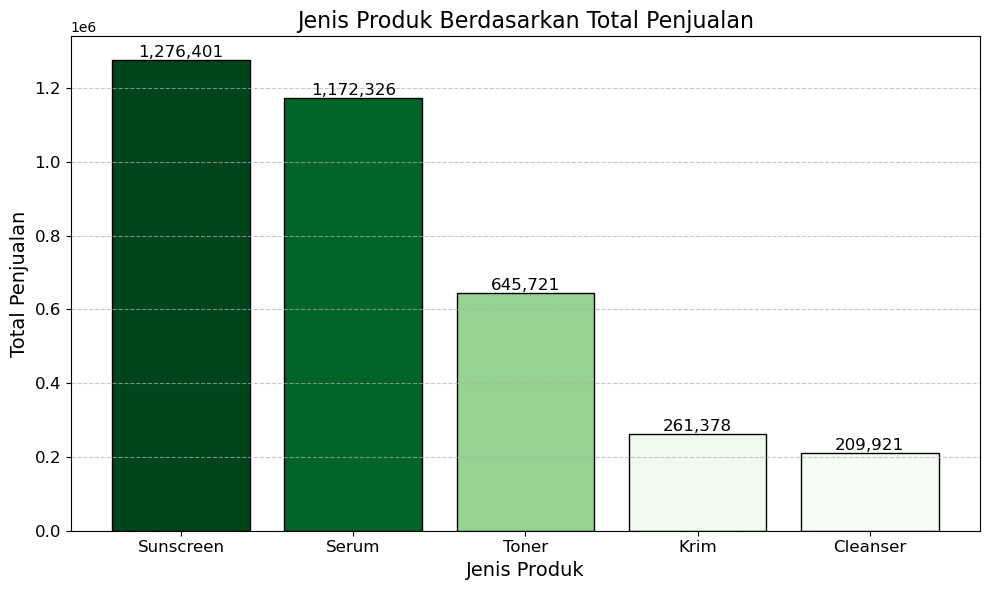

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Menghitung total produk terjual berdasarkan jenis
jenis_penjualan = df.groupby('jenis')['produkterjual'].sum().reset_index()

# Mengurutkan berdasarkan produk terjual dari yang terbesar
jenis_penjualan = jenis_penjualan.sort_values(by='produkterjual', ascending=False)

# Mendapatkan Top 5 jenis dengan total penjualan terbanyak
top_5_jenis = jenis_penjualan.head(5)

# Normalisasi untuk mendapatkan skala warna
norm = plt.Normalize(top_5_jenis['produkterjual'].min(), top_5_jenis['produkterjual'].max())
colors = plt.cm.Greens(norm(top_5_jenis['produkterjual']))  # Menggunakan palet hijau

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_jenis['jenis'], top_5_jenis['produkterjual'], color=colors, edgecolor='black')

# Menambahkan judul dan label
plt.xlabel('Jenis Produk', fontsize=14)
plt.ylabel('Total Penjualan', fontsize=14)
plt.title('Jenis Produk Berdasarkan Total Penjualan', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan anotasi nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom', fontsize=12, color='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

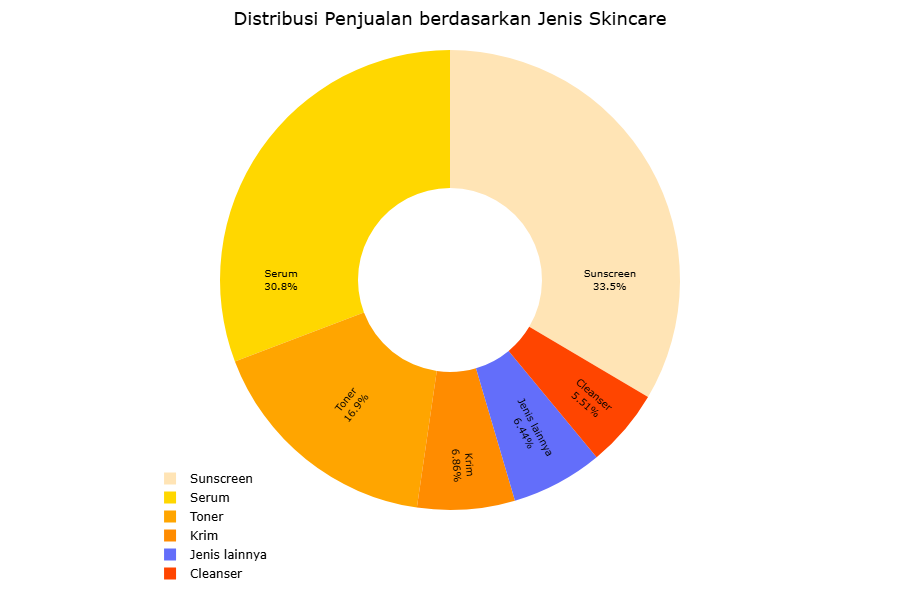

In [32]:
import pandas as pd
import plotly.graph_objects as go

# Menghitung total penjualan per jenis
type_sales = df.groupby('jenis')['produkterjual'].sum().sort_values(ascending=False)
threshold_percentage = 5

# Hitung persentase penjualan per jenis
total_sales = type_sales.sum()
type_sales_percentage = (type_sales / total_sales) * 100

# Menentukan kategori dengan persentase di bawah threshold
small_types = type_sales_percentage[type_sales_percentage < threshold_percentage].index

# Menggabungkan kategori kecil menjadi 'Others'
type_sales['Jenis lainnya'] = type_sales[small_types].sum()
type_sales = type_sales[~type_sales.index.isin(small_types)]

# Hitung persentase baru setelah penggabungan
type_sales_percentage = (type_sales / total_sales) * 100

# Definisikan palet warna dari terang ke gelap
colors = ['#FFE4B5', '#FFD700', '#FFA500', '#FF8C00', '#FF4500']  # Dari terang ke gelap
num_types = len(type_sales)

# Membuat pie chart dengan Plotly
fig = go.Figure()

# Menambahkan trace untuk pie chart
fig.add_trace(go.Pie(
    labels=type_sales.index,  # Menggunakan label jenis
    values=type_sales.values,  # Menggunakan jumlah produk terjual
    hole=0.4,  # Membuat Donut Chart
    textinfo='label+percent',  # Menampilkan label dan persentase
    insidetextorientation='radial',  # Orientasi teks di dalam pie chart
    marker=dict(colors=colors[:num_types]),  # Warna dari terang ke gelap
    textfont=dict(size=10, color='black'),  # Ukuran dan warna teks di dalam pie chart
    hovertemplate='<b>%{label}</b><br>Persentase: %{percent:.2%}<br>Jumlah: %{value:.0f} produk<extra></extra>'  # Menampilkan jumlah produk terjual
))

fig.update_layout(
    title={
        'text': 'Distribusi Penjualan berdasarkan Jenis Skincare',
        'font_size': 18,
        'font_color': 'black',
        'x': 0.5,
        'xanchor': 'center'
    },
    template='plotly_white',  # Tema terang
    plot_bgcolor='white',  # Latar belakang plot putih
    paper_bgcolor='white',  # Latar belakang kertas putih
    legend=dict(
        font=dict(color='black'),  # Warna teks legend hitam
        orientation='v',  # Orientasi vertikal
        yanchor='top',
        y=0.1,  # Menempatkan legend di samping pie chart
        xanchor='left',
        x=0.0001  # Menempatkan legend sedikit lebih jauh di sebelah kanan pie chart
    ),
    margin=dict(l=150, r=150, t=50, b=15),  # Mengatur margin
    height=600,  # Tinggi plot
    width=900  # Lebar plot
)

# Menampilkan plot
fig.show()

## Visualisasi Distribusi Penjualan Berdasarkan Provinsi

#### Mengelompokkan data berdasarkan provinsi

In [33]:
provinsi_penjualan = df.groupby('provinsi')['produkterjual'].sum().reset_index()
# Mengurutkan berdasarkan total penjualan dari yang tertinggi ke terendah
provinsi_penjualan = provinsi_penjualan.sort_values(by='produkterjual', ascending=False)
provinsi_penjualan

provinsi  produkterjual
3          DKI Jakarta        1343639
5           Jawa Barat        1300341
7           Jawa Timur         546001
1               Banten         469814
6          Jawa Tengah          61757
18      Sumatera Utara          38104
2       DIY Yogyakarta          35323
13    Sulawesi Selatan           6610
0                 Bali           4699
11             Lampung           2292
17    Sumatera Selatan           2264
9     Kalimantan Timur            421
4                Jambi             60
16      Sumatera Barat             18
10      Kepulauan Riau             14
15      Sulawesi Utara             14
12                Riau              5
8   Kalimantan Selatan              0
14     Sulawesi Tengah              0

#### Distribusi 'produkterjual' berdasarkan 'provinsi':

Top 5 Provinsi Berdasarkan Total Penjualan:
      provinsi  produkterjual
3  DKI Jakarta        1343639
5   Jawa Barat        1300341
7   Jawa Timur         546001
1       Banten         469814
6  Jawa Tengah          61757


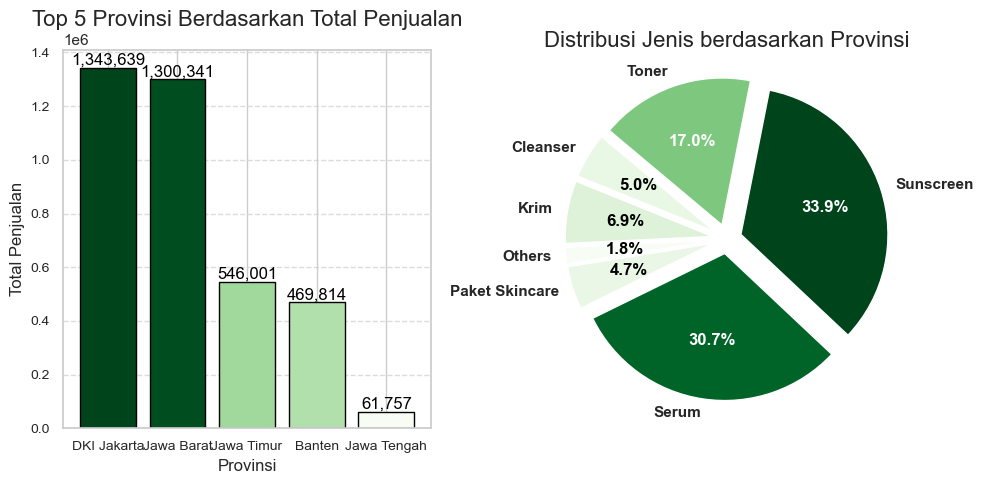

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Menghitung total penjualan per provinsi
provinsi_penjualan = df.groupby('provinsi')['produkterjual'].sum().reset_index()
provinsi_penjualan = provinsi_penjualan.sort_values(by='produkterjual', ascending=False)
top_5_provinsi = provinsi_penjualan.head(5)
print("Top 5 Provinsi Berdasarkan Total Penjualan:")
print(top_5_provinsi)

# Menghitung jumlah produk terjual berdasarkan jenis untuk top 5 provinsi
jenis_per_provinsi = df[df['provinsi'].isin(top_5_provinsi['provinsi'])].groupby(['provinsi', 'jenis'])['produkterjual'].sum().reset_index()

# Visualisasi Bar Chart
plt.figure(figsize=(10, 5))

# Bar Chart
plt.subplot(1, 2, 1)
norm = plt.Normalize(top_5_provinsi['produkterjual'].min(), top_5_provinsi['produkterjual'].max())
colors = plt.cm.Greens(norm(top_5_provinsi['produkterjual']))  # Menggunakan palet hijau
bars = plt.bar(top_5_provinsi['provinsi'], top_5_provinsi['produkterjual'], color=colors, edgecolor='black')
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.title('Top 5 Provinsi Berdasarkan Total Penjualan', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan anotasi nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom', fontsize=12, color='black')

# Pie Chart untuk distribusi jenis berdasarkan provinsi
plt.subplot(1, 2, 2)

# Menghitung total penjualan berdasarkan jenis
jenis_counts = jenis_per_provinsi.groupby('jenis')['produkterjual'].sum().reset_index()

# Hitung persentase penjualan per jenis
total_sales = jenis_counts['produkterjual'].sum()
jenis_counts['percentage'] = (jenis_counts['produkterjual'] / total_sales) * 100

# Tentukan kategori dengan persentase di bawah threshold
threshold_percentage = 4
small_types = jenis_counts[jenis_counts['percentage'] < threshold_percentage]['jenis']

# Gabungkan kategori kecil menjadi 'Others'
jenis_counts.loc[jenis_counts['jenis'].isin(small_types), 'jenis'] = 'Others'
jenis_counts = jenis_counts.groupby('jenis').sum().reset_index()

# Normalisasi warna untuk pie chart
norm = plt.Normalize(jenis_counts['produkterjual'].min(), jenis_counts['produkterjual'].max())
colors = plt.cm.Greens(norm(jenis_counts['produkterjual']))  # Menggunakan palet hijau

# Pie Chart
explode = [0.1] * len(jenis_counts)  # Mengatur eksplosi untuk menonjolkan bagian pie
wedges, texts, autotexts = plt.pie(jenis_counts['produkterjual'], labels=jenis_counts['jenis'], 
                                    autopct='%1.1f%%', startangle=140, explode=explode, 
                                    wedgeprops={'edgecolor': 'w'}, colors=colors, 
                                    textprops={'fontweight': 'bold'})  # Menjadikan teks bold
plt.title('Distribusi Jenis berdasarkan Provinsi', fontsize=16)

# Menyesuaikan warna teks di dalam pie chart
for j, autotext in enumerate(autotexts):
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')  # Menjadikan teks di dalam pie chart bold
    # Mengubah warna teks berdasarkan warna irisan
    if colors[j][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

plt.tight_layout()
plt.show()

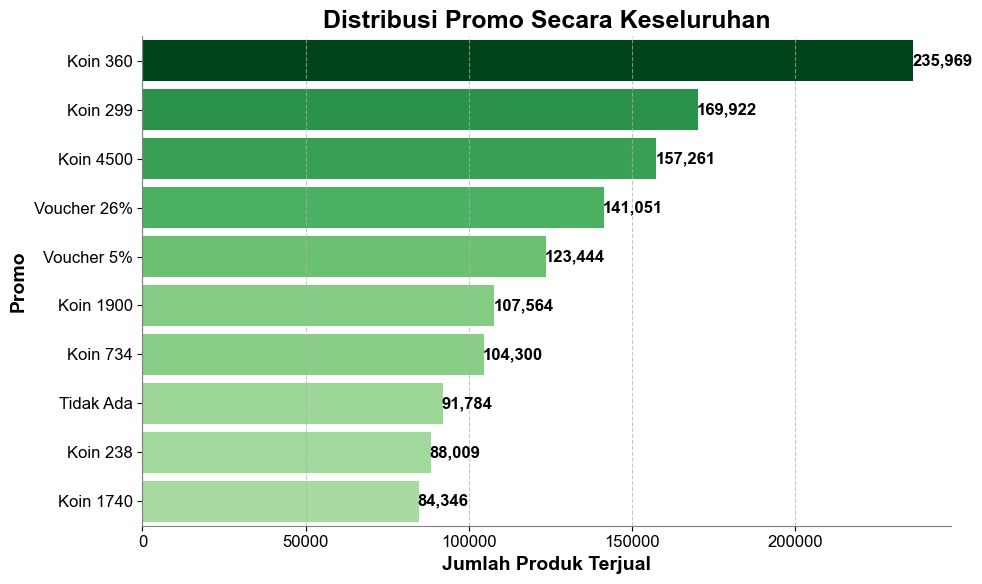

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total produk terjual berdasarkan promo di seluruh provinsi
promo_sales = df.groupby('promo')['produkterjual'].sum().reset_index().sort_values(by='produkterjual', ascending=False)

# Mengambil top 10 promo berdasarkan produk terjual
top_10_promo = promo_sales.head(10)

# Setup plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_10_promo['promo'], x=top_10_promo['produkterjual'], palette='Greens')

# Warna gradient dan garis tepi
for patch in ax.patches:
    color_value = patch.get_width() / top_10_promo['produkterjual'].max()
    color = plt.cm.Greens(color_value)
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    patch.set_facecolor(color)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', 
                (width + 5, p.get_y() + p.get_height() / 2.),  # Pindahkan teks sedikit ke kanan
                ha='left', va='center', 
                fontsize=12, 
                color='black', 
                weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo Secara Keseluruhan', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Distribusi Penjualan Berdasarkan Jenis Produk dan Daerah pada tiap provinsi 

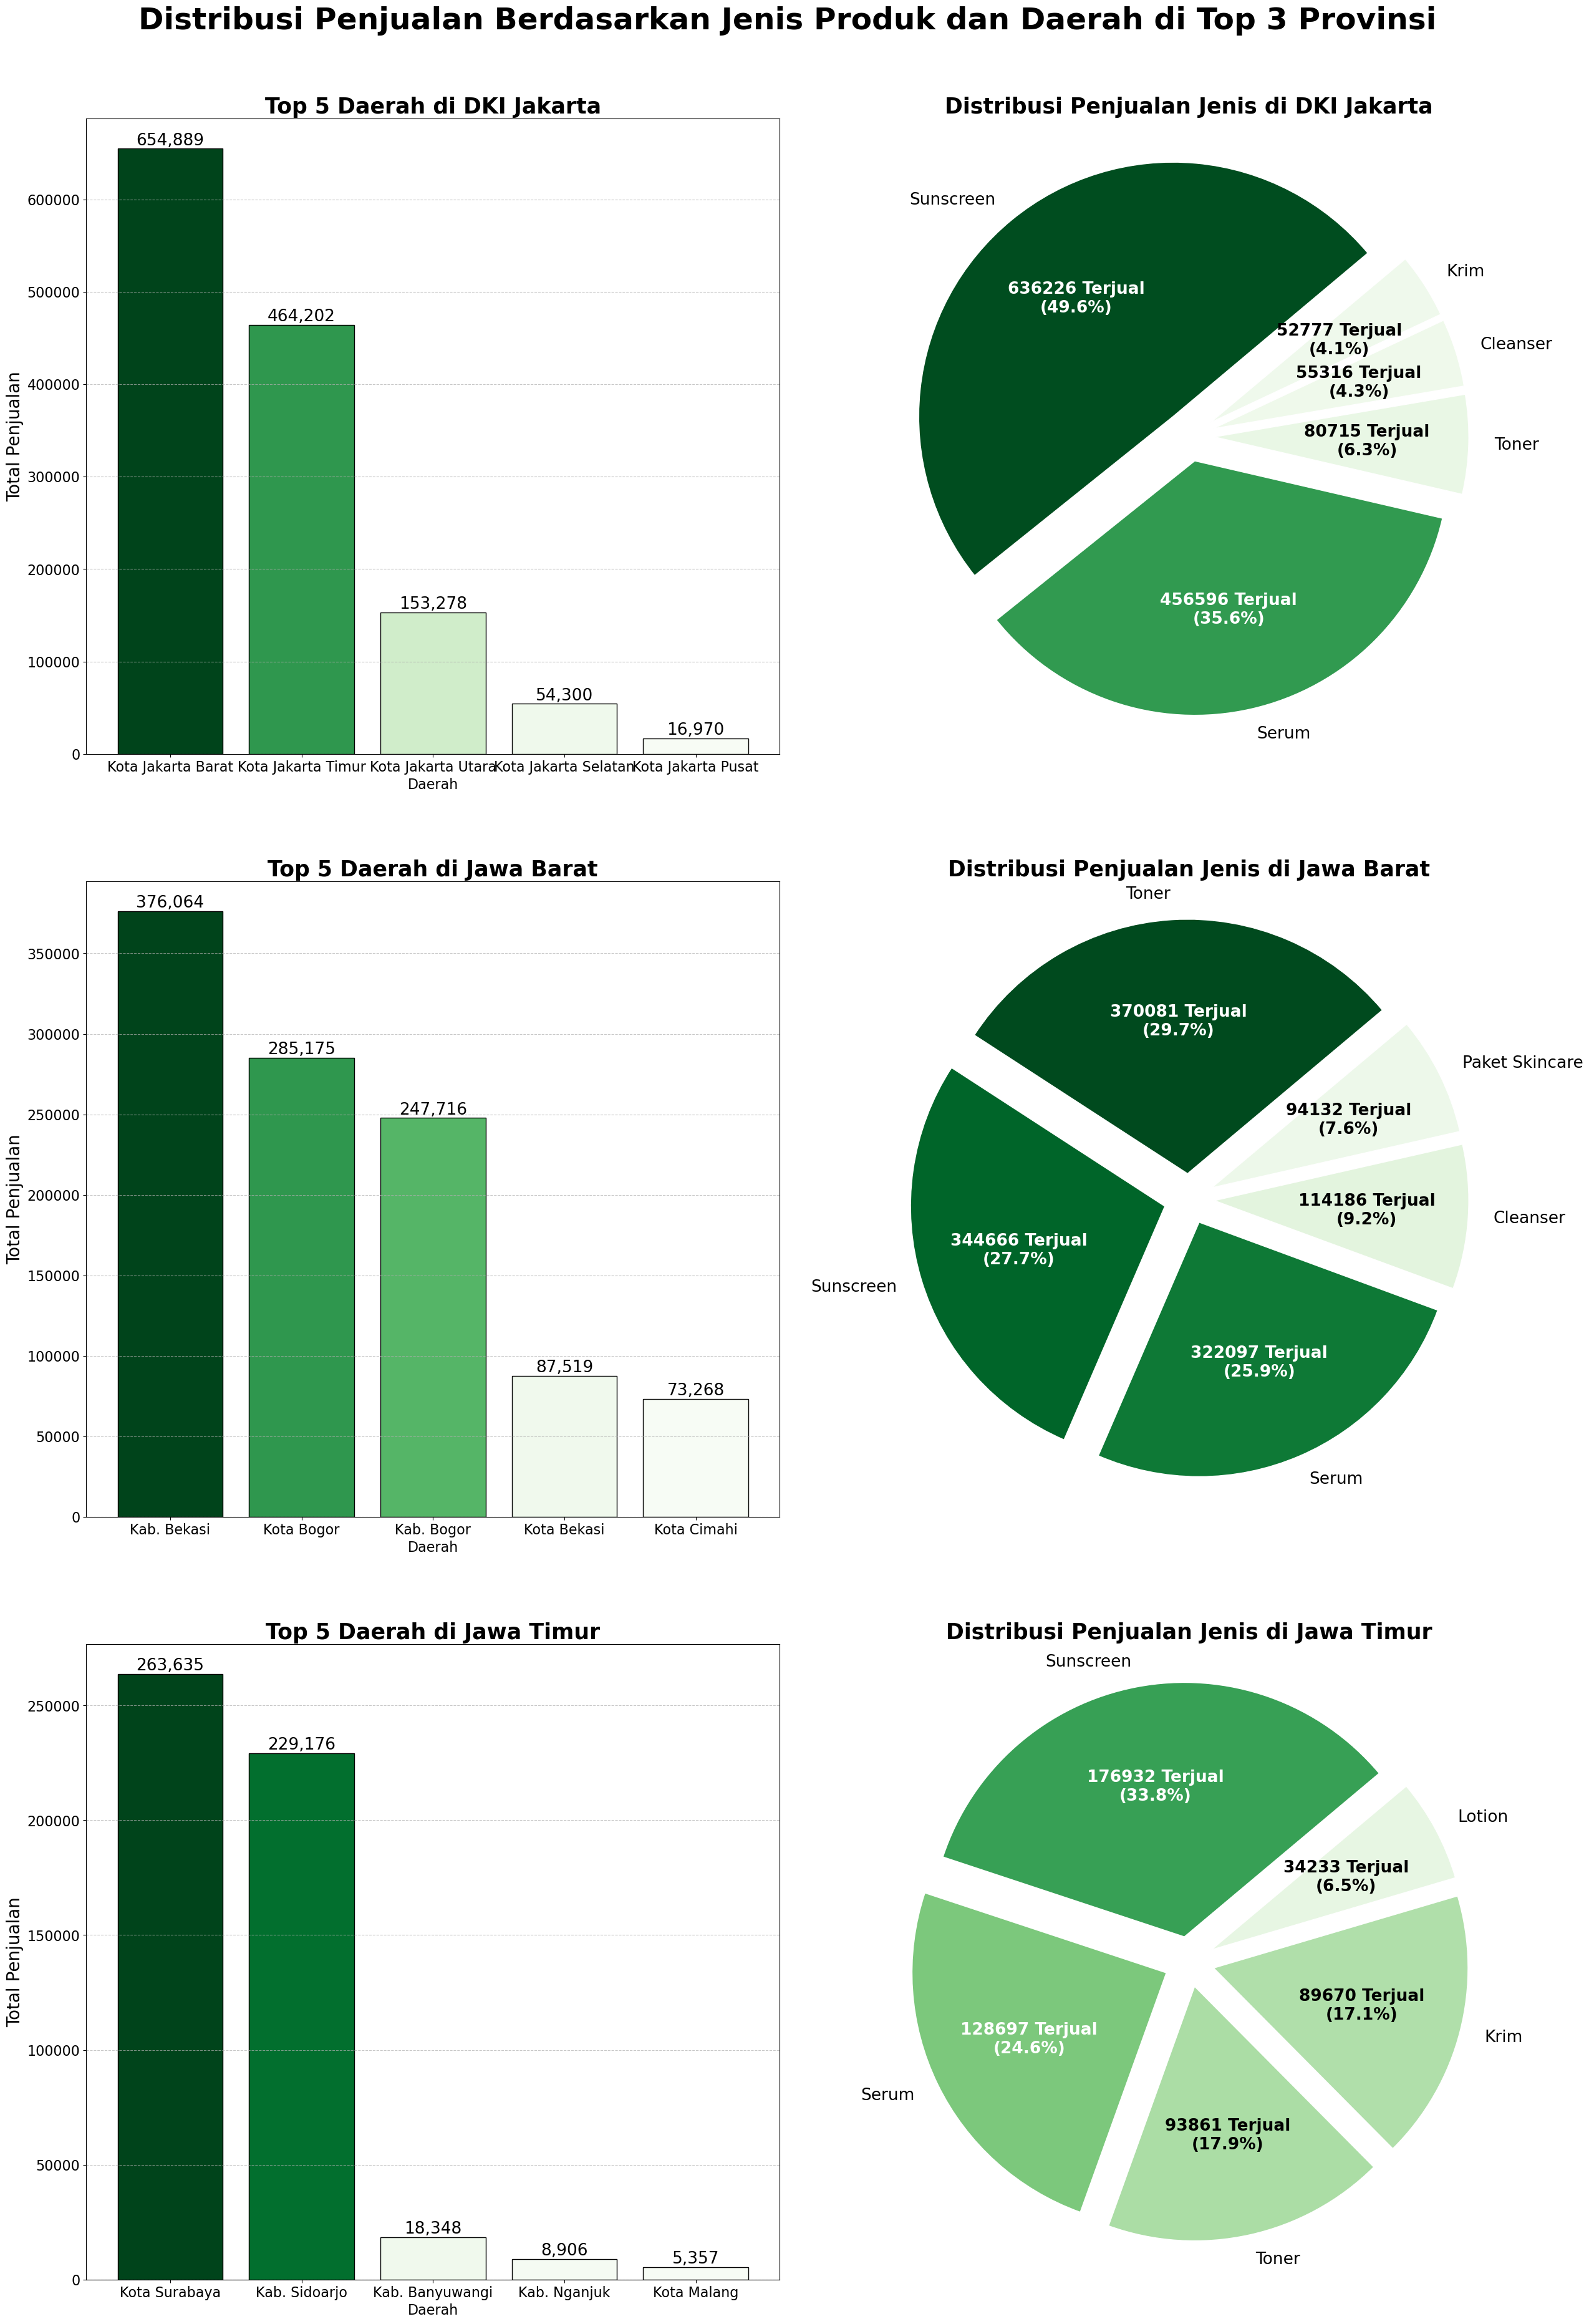

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung total produk terjual per provinsi
provinsi_penjualan = df.groupby('provinsi')['produkterjual'].sum().reset_index()
provinsi_penjualan = provinsi_penjualan.sort_values(by='produkterjual', ascending=False)
top_3_provinsi = provinsi_penjualan.head(3)
top_3_provinsi_list = top_3_provinsi['provinsi'].tolist()

# Filter data untuk top 3 provinsi
top_3_data = df[df['provinsi'].isin(top_3_provinsi_list)]

# Visualisasi
fig, axs = plt.subplots(len(top_3_provinsi_list), 2, figsize=(30, 15 * len(top_3_provinsi_list)))
fig.suptitle('Distribusi Penjualan Berdasarkan Jenis Produk dan Daerah di Top 3 Provinsi', fontsize=35, y=0.92, fontweight='bold')
fig.subplots_adjust(hspace=0.2, wspace=0.09)

for i, provinsi in enumerate(top_3_provinsi_list):
    prov_data = top_3_data[top_3_data['provinsi'] == provinsi]
    
    # Bar Chart untuk distribusi daerah berdasarkan produk terjual
    bar_data = prov_data.groupby('daerah')['produkterjual'].sum().reset_index()
    bar_data = bar_data.sort_values(by='produkterjual', ascending=False).head(5)
    
    # Normalisasi warna
    norm = plt.Normalize(bar_data['produkterjual'].min(), bar_data['produkterjual'].max())
    bar_colors = plt.cm.Greens(norm(bar_data['produkterjual']))  # Palet hijau
    
    bars = axs[i, 0].bar(
        bar_data['daerah'], 
        bar_data['produkterjual'], 
        color=bar_colors, 
        edgecolor='black'
    )
    axs[i, 0].set_ylabel('Total Penjualan', fontsize=20)
    axs[i, 0].set_xlabel('Daerah', fontsize=16)
    axs[i, 0].set_title(f'Top 5 Daerah di {provinsi}', fontsize=25, fontweight='bold')
    axs[i, 0].tick_params(axis='both', labelsize=16)
    axs[i, 0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Menambahkan anotasi nilai di atas bar
    for bar in bars:
        height = bar.get_height()
        axs[i, 0].text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height:,.0f}', 
            ha='center', 
            va='bottom', 
            fontsize=19, 
            color='black'
        )
    
    # Pie Chart untuk distribusi produk terjual berdasarkan jenis
    pie_data = prov_data.groupby('jenis')['produkterjual'].sum().reset_index()
    pie_data = pie_data.sort_values(by='produkterjual', ascending=False).head(5)

    # Normalisasi warna untuk pie chart
    pie_colors = plt.cm.Greens(norm(pie_data['produkterjual']))  # Palet hijau
    
    # Mengatur eksplosi untuk menonjolkan bagian pie
    explode = [0.1] * len(pie_data)
    
    wedges, texts, autotexts = axs[i, 1].pie(
        pie_data['produkterjual'], 
        labels=pie_data['jenis'],  
        autopct=lambda p: f'{int(p * pie_data["produkterjual"].sum() / 100)} Terjual\n({p:.1f}%)',
        colors=pie_colors, 
        startangle=40, 
        explode=explode, 
        wedgeprops={'edgecolor': 'w'}
    )
    axs[i, 1].set_title(f'Distribusi Penjualan Jenis di {provinsi}', fontsize=25, fontweight='bold')
    
    # Menyesuaikan ukuran font dan jarak label
    for text in texts:
        text.set_fontsize(19)
    for j, autotext in enumerate(autotexts):
        autotext.set_fontsize(19)
        autotext.set_fontweight('bold')  # Menjadikan teks di dalam pie chart bold
        # Mengubah warna teks berdasarkan warna irisan
        if pie_colors[j][0] < 0.5:  # Jika warna gelap
            autotext.set_color('white')
        else:  # Jika warna terang
            autotext.set_color('black')

plt.show()

#### Visualisasi distribusi produkterjual Berdasarkan Daerah

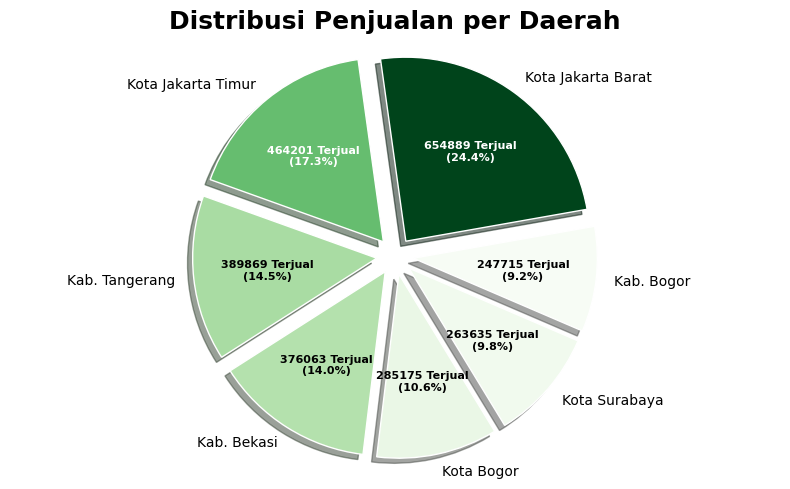

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung total penjualan per daerah
sales_per_daerah = df.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menentukan 10 daerah teratas
top_daerahs = sales_per_daerah.head(7)

# Menghitung persentase penjualan
total_sales = sales_per_daerah.sum()
sales_percentage = (top_daerahs / total_sales) * 100

# Menentukan threshold
threshold_percentage = 5
small_daerahs = sales_percentage[sales_percentage < threshold_percentage]

# Menghitung ulang persentase setelah penggabungan
if not small_daerahs.empty:
    top_daerahs['Lainnya'] = small_daerahs.sum()
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100
else:
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100

# Normalisasi warna
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Greens(norm(sales_percentage_updated))

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=10,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan title untuk pie chart
plt.title('Distribusi Penjualan per Daerah', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Distribusi Daerah Berdasarkan Jumlah Produk Terjual

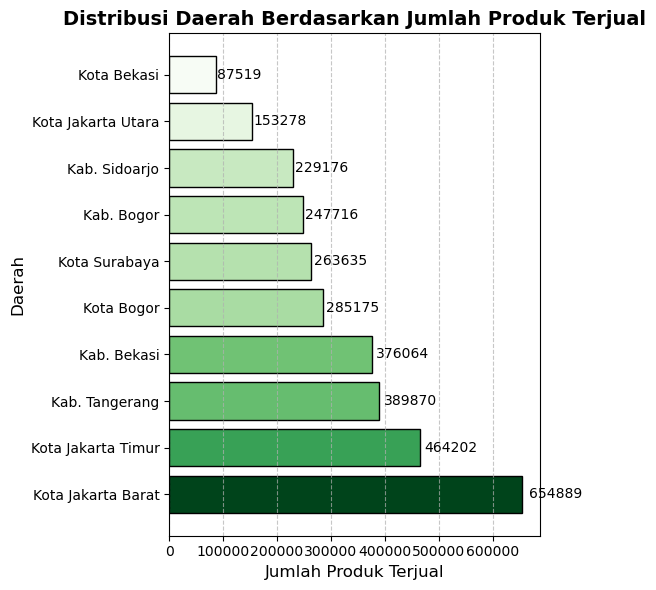

In [37]:
top_10_daerah = df.groupby('daerah')['produkterjual'].sum().nlargest(10).reset_index()

# Visualisasi distribusi 'produkterjual' per kota
plt.figure(figsize=(6, 6))  # Ukuran figure disesuaikan untuk tampilan yang lebih baik

# Normalisasi untuk mendapatkan skala warna
norm = plt.Normalize(top_10_daerah['produkterjual'].min(), top_10_daerah['produkterjual'].max())
colors = plt.cm.Greens(norm(top_10_daerah['produkterjual']))  # Menggunakan palet hijau

# Membuat horizontal bar chart
bars = plt.barh(top_10_daerah['daerah'], top_10_daerah['produkterjual'], color=colors, edgecolor='black')

# Menambahkan anotasi pada setiap bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.02 * xval, bar.get_y() + bar.get_height()/2, f'{int(xval)}', 
             ha='left', va='center', fontsize=10, color='black')

# Menyesuaikan elemen visual
plt.xlabel("Jumlah Produk Terjual", fontsize=12)
plt.ylabel("Daerah", fontsize=12)
plt.title("Distribusi Daerah Berdasarkan Jumlah Produk Terjual", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Menambahkan grid pada sumbu x
plt.tight_layout()
plt.show()

#### Rata rata harga pada top 5 provinsi

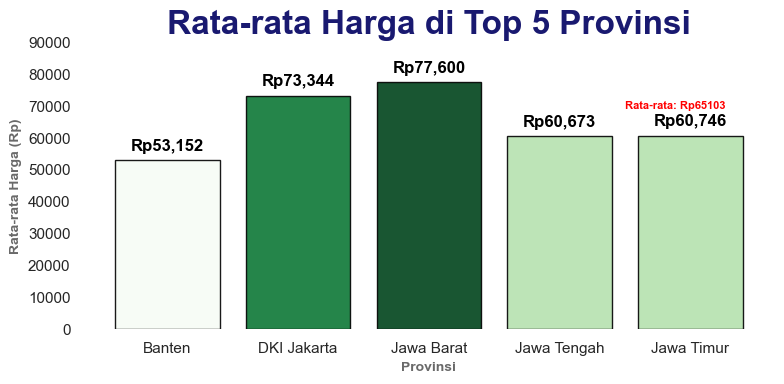

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menghitung total produk terjual per provinsi
total_terjual_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().reset_index()

# Memilih 5 provinsi teratas berdasarkan produk terjual terbanyak
top_5_provinsi = total_terjual_per_provinsi.nlargest(5, 'produkterjual')

# Filter data untuk 5 provinsi teratas
df_top_5_provinsi = df[df['provinsi'].isin(top_5_provinsi['provinsi'])]

# Menghitung rata-rata harga per provinsi di 5 provinsi teratas
avg_harga_top_5 = df_top_5_provinsi.groupby('provinsi')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5 = avg_harga_top_5.merge(top_5_provinsi, on='provinsi')

# Membuat gradien warna berdasarkan harga
norm = plt.Normalize(avg_harga_top_5['harga'].min(), avg_harga_top_5['harga'].max())
colors = plt.cm.Greens(norm(avg_harga_top_5['harga']))  # Menggunakan palet hijau

# Membuat visualisasi
plt.figure(figsize=(8, 4))

# Grafik: Rata-rata Harga di Top 5 Provinsi
barplot = plt.bar(avg_harga_top_5['provinsi'], avg_harga_top_5['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga di Top 5 Provinsi', fontsize=24, weight='bold', color='midnightblue')
plt.xlabel('Provinsi', fontsize=10, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=10, weight='bold', color='dimgray')

# Mengatur batas sumbu Y mulai dari 0 dan ditetapkan hingga 90.000
plt.ylim(0, 90000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 90001, 10000))  # Set interval setiap 10.000

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5['harga'].mean()
plt.text(3.5, mean_value + 4000, 'Rata-rata: Rp{:.0f}'.format(mean_value), color='red', fontsize=8, fontweight='bold')

# Menghilangkan grid dan spines untuk tampilan bersih
ax = plt.gca()  # Ambil objek Axes saat ini
ax.grid(False)  # Menghapus grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('none')  # Latar belakang transparan

# Menampilkan plot
plt.tight_layout()
plt.show()

## Pengelompokan Analisis berdasarkan Top 3 Provinsi teratas

#### Identifikasi tiga provinsi dengan penjualan terbanyak

In [39]:
sales_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)
top_provinsi = sales_per_provinsi.head(3)  # Provinsi dengan penjualan terbanyak
print("Tiga provinsi dengan penjualan terbanyak:")
print(top_provinsi)

Tiga provinsi dengan penjualan terbanyak:
provinsi
DKI Jakarta    1343639
Jawa Barat     1300341
Jawa Timur      546001
Name: produkterjual, dtype: int32


### DKI Jakarta

#### Distribusi Penjualan Produk Berdasarkan Daerah di DKI Jakarta

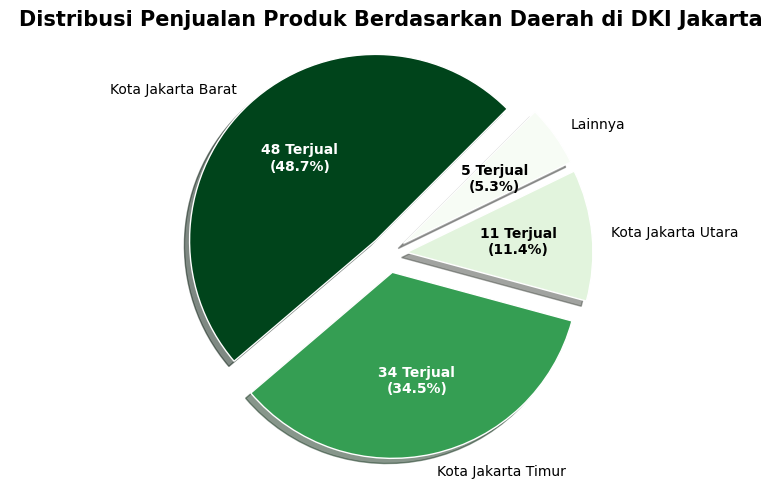

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan threshold
threshold_percentage = 5

# Filter data untuk DKI Jakarta
dki_jakarta_data = df[df['provinsi'] == 'DKI Jakarta']

# Menghitung total produk terjual per daerah
sales_per_daerah = dki_jakarta_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menghitung persentase penjualan
total_sales = sales_per_daerah.sum()
sales_percentage = (sales_per_daerah / total_sales) * 100

# Menentukan daerah yang di bawah threshold
small_daerahs = sales_percentage[sales_percentage < threshold_percentage]

# Menentukan daerah di atas threshold
top_daerahs = sales_percentage[sales_percentage >= threshold_percentage]

# Menghitung ulang persentase setelah penggabungan
if not small_daerahs.empty:
    top_daerahs['Lainnya'] = small_daerahs.sum()
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100
else:
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100

# Normalisasi warna
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Greens(norm(sales_percentage_updated))

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=45,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan title untuk pie chart
plt.title('Distribusi Penjualan Produk Berdasarkan Daerah di DKI Jakarta', fontsize=15, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Jenis yang Terjual di DKI Jakarta

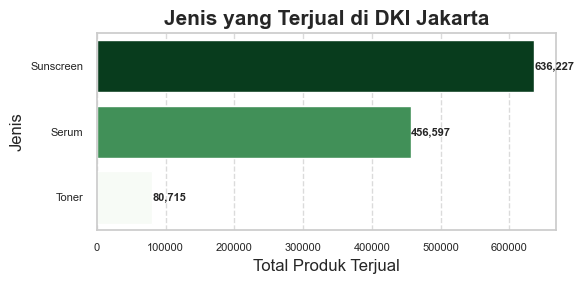

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi DKI Jakarta
dki_jakarta_data = df[df['provinsi'] == 'DKI Jakarta']

# Menghitung total produk terjual per jenis di DKI Jakarta
jenis_dki_jakarta = dki_jakarta_data.groupby('jenis')['produkterjual'].sum().reset_index()
jenis_dki_jakarta = jenis_dki_jakarta.sort_values(by='produkterjual', ascending=False)

# Mengambil top 5 jenis
top_5_jenis = jenis_dki_jakarta.head(3)

# Normalisasi warna: semakin besar produk terjual, semakin gelap
norm = plt.Normalize(top_5_jenis['produkterjual'].min(), top_5_jenis['produkterjual'].max())
colors = plt.cm.Greens(norm(top_5_jenis['produkterjual']))  # Menggunakan palet hijau

# Visualisasi
plt.figure(figsize=(6, 3))  # Ukuran figure
sns.barplot(x='produkterjual', y='jenis', data=top_5_jenis, palette=colors)  # Gunakan warna yang sudah dinormalisasi

# Menambahkan anotasi
for index, value in enumerate(top_5_jenis['produkterjual']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=8, weight='bold')

# Judul dan label
plt.title('Jenis yang Terjual di DKI Jakarta', fontsize=15, weight='bold')
plt.xlabel('Total Produk Terjual', fontsize=12)
plt.ylabel('Jenis', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)  # Kecilkan ukuran font label di sumbu Y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Filter data untuk provinsi DKI Jakarta dan merek 'unknown'

In [42]:
# Mengambil data untuk produk dengan merek 'Unknown' di DKI Jakarta
unknown_merek_dki_jakarta = df[(df['provinsi'] == 'DKI Jakarta') & (df['jenis'] == 'Unknown')]
unknown_dki_jakarta_sorted = unknown_merek_dki_jakarta[['namaproduk', 'produkterjual']].sort_values(by='produkterjual', ascending=False)
unknown_dki_jakarta = unknown_dki_jakarta_sorted.head(20)
unknown_dki_jakarta

namaproduk  produkterjual
87                  madame gie protect me          10100
4447   mh cosmetic asli ber id card resmi            143
6729  oncolour peach glow perfector light             75
1604     hanasui collagen water sanscreen              0
5734         loreal defender water resist              0

#### Distribusi Promo di Provinsi DKI Jakarta

Provinsi dengan penjualan terbanyak: DKI Jakarta dengan jumlah produk terjual: 1343639


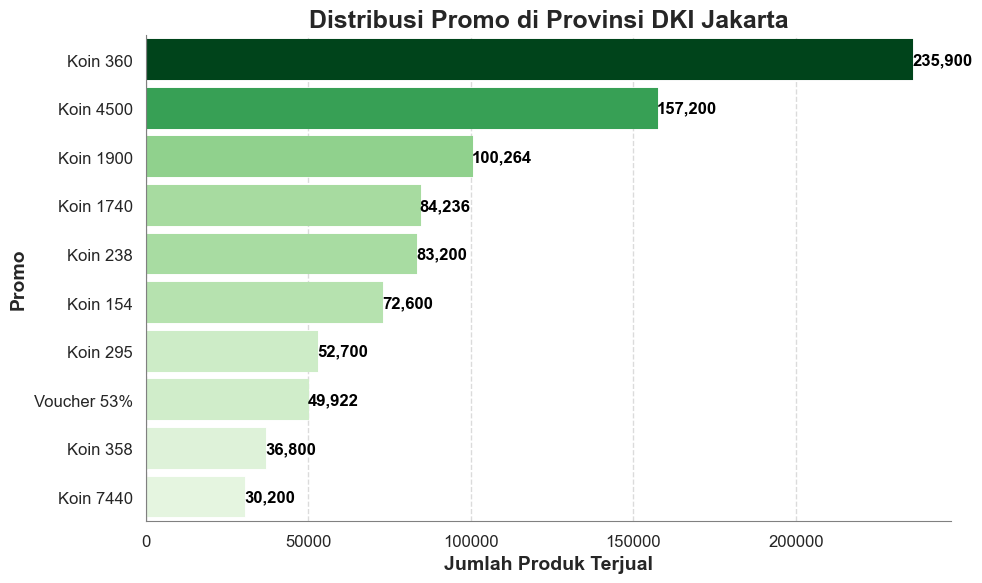

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total produk terjual per provinsi
sales_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi provinsi DKI Jakarta
top_provinsi = 'DKI Jakarta'
top_provinsi_sales = sales_per_provinsi.loc[top_provinsi]
print(f"Provinsi dengan penjualan terbanyak: {top_provinsi} dengan jumlah produk terjual: {top_provinsi_sales}")

# Filter data untuk DKI Jakarta
top_provinsi_data = df[df['provinsi'] == top_provinsi]

# Total produk terjual berdasarkan promo di DKI Jakarta
top_5_promo_provinsi = top_provinsi_data.groupby('promo')['produkterjual'].sum().nlargest(10)

# Setup plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_5_promo_provinsi.index, x=top_5_promo_provinsi.values, palette='Greens')

# Warna gradient dan garis tepi
for patch in ax.patches:
    color_value = patch.get_width() / top_5_promo_provinsi.max()
    color = plt.cm.Greens(color_value)
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    patch.set_facecolor(color)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', 
                (width + 5, p.get_y() + p.get_height() / 2.),  # Pindahkan teks sedikit ke kanan
                ha='left', va='center', 
                fontsize=12, 
                color='black', 
                weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo di Provinsi {top_provinsi}', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Distribusi promo di daerah dengan penjualan terbanyak di provinsi DKI Jakarta

Daerah dengan penjualan terbanyak di DKI Jakarta: Kota Jakarta Barat dengan jumlah produk terjual: 654889


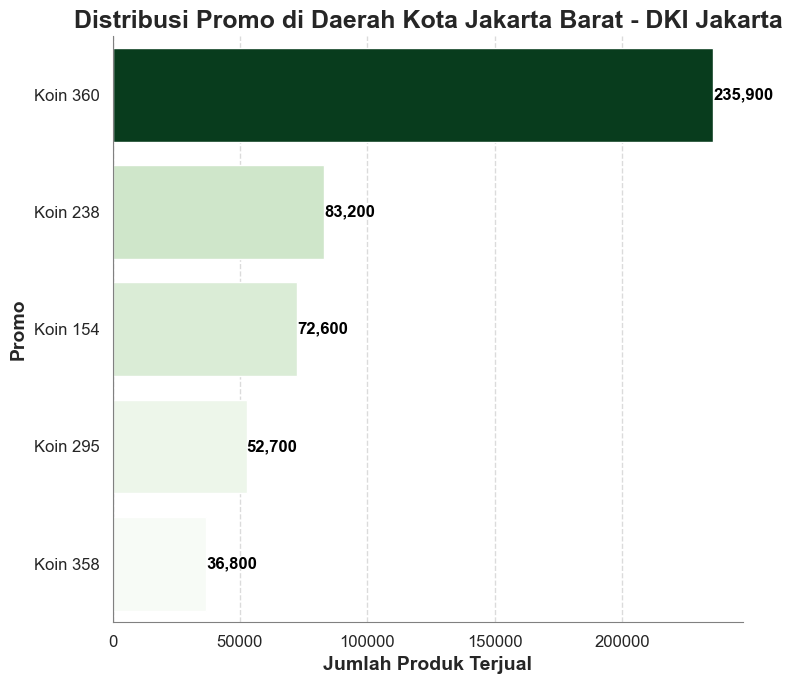

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi DKI Jakarta
dki_jakarta_data = df[df['provinsi'] == 'DKI Jakarta']

# Total produk terjual per daerah di DKI Jakarta
sales_per_daerah_dki = dki_jakarta_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi daerah dengan penjualan terbanyak di DKI Jakarta
top_daerah_dki = sales_per_daerah_dki.index[0]
top_daerah_sales_dki = sales_per_daerah_dki.iloc[0]
print(f"Daerah dengan penjualan terbanyak di DKI Jakarta: {top_daerah_dki} dengan jumlah produk terjual: {top_daerah_sales_dki}")

# Filter data untuk daerah dengan penjualan terbanyak di DKI Jakarta
top_daerah_data_dki = dki_jakarta_data[dki_jakarta_data['daerah'] == top_daerah_dki]

# Total produk terjual berdasarkan promo di daerah dengan penjualan terbanyak di DKI Jakarta
top_5_promo_dki = top_daerah_data_dki.groupby('promo')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(8, 7))  # Ukuran figure disesuaikan untuk tampilan yang lebih baik

# Normalisasi warna berdasarkan nilai
norm = plt.Normalize(top_5_promo_dki.min(), top_5_promo_dki.max())
colors = plt.cm.Greens(norm(top_5_promo_dki.values))

# Membuat barplot
ax = sns.barplot(y=top_5_promo_dki.index, x=top_5_promo_dki.values, palette=colors)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', (width + 5, p.get_y() + p.get_height() / 2.),  # Geser keterangan ke kanan
                ha='left', va='center', fontsize=12, color='black', weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo di Daerah {top_daerah_dki} - DKI Jakarta', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Rata rata Harga di 5 Daerah Teratas di Provinsi DKI Jakarta

C:\Users\hp\AppData\Local\Temp\ipykernel_34680\1210255598.py:48: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



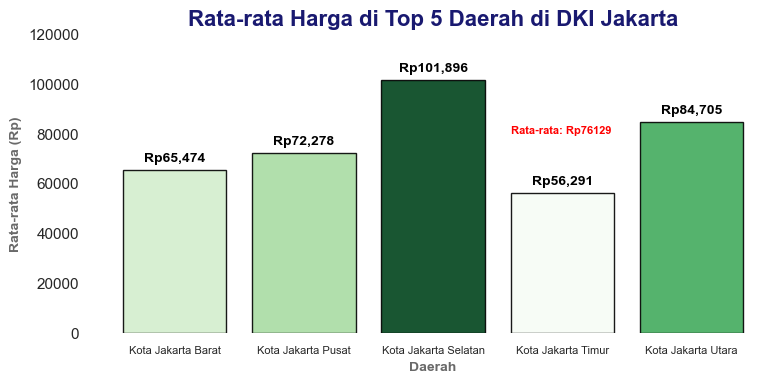

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data untuk provinsi DKI Jakarta
dki_jakarta_data = df[df['provinsi'] == 'DKI Jakarta']

# Menghitung total produk terjual per daerah di DKI Jakarta
total_terjual_per_daerah = dki_jakarta_data.groupby('daerah')['produkterjual'].sum().reset_index()

# Memilih 5 daerah teratas berdasarkan produk terjual terbanyak
top_5_daerah = total_terjual_per_daerah.nlargest(5, 'produkterjual')

# Filter data untuk 5 daerah teratas
df_top_5_daerah = dki_jakarta_data[dki_jakarta_data['daerah'].isin(top_5_daerah['daerah'])]

# Menghitung rata-rata harga per daerah di 5 daerah teratas
avg_harga_top_5_daerah = df_top_5_daerah.groupby('daerah')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5_daerah = avg_harga_top_5_daerah.merge(top_5_daerah, on='daerah')

# Membuat gradien warna berdasarkan harga
norm = plt.Normalize(avg_harga_top_5_daerah['harga'].min(), avg_harga_top_5_daerah['harga'].max())
colors = plt.cm.Greens(norm(avg_harga_top_5_daerah['harga']))  # Menggunakan palet hijau

# Membuat visualisasi
plt.figure(figsize=(8, 4))

# Grafik: Rata-rata Harga di Top 5 Daerah di DKI Jakarta
barplot = plt.bar(avg_harga_top_5_daerah['daerah'], avg_harga_top_5_daerah['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga di Top 5 Daerah di DKI Jakarta', fontsize=16, weight='bold', color='midnightblue')
plt.xlabel('Daerah', fontsize=10, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=10, weight='bold', color='dimgray')

# Mengatur batas sumbu Y mulai dari 0 dan ditetapkan hingga 120.000
plt.ylim(0, 120000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 120001, 20000))  # Set interval setiap 20.000

# Mengatur ukuran font pada label daerah
ax = plt.gca()
ax.set_xticklabels(avg_harga_top_5_daerah['daerah'], fontsize=8)

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5_daerah['harga'].mean()
plt.text(2.6, mean_value + 4000, 'Rata-rata: Rp{:.0f}'.format(mean_value), color='red', fontsize=8, fontweight='bold')

# Menghilangkan grid dan spines untuk tampilan bersih
ax.grid(False)  # Menghapus grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('none')  # Latar belakang transparan

# Menampilkan plot
plt.tight_layout()
plt.show()

### Jawa Barat

#### Distribusi Penjualan Produk Berdasarkan Daerah di Jawa Barat

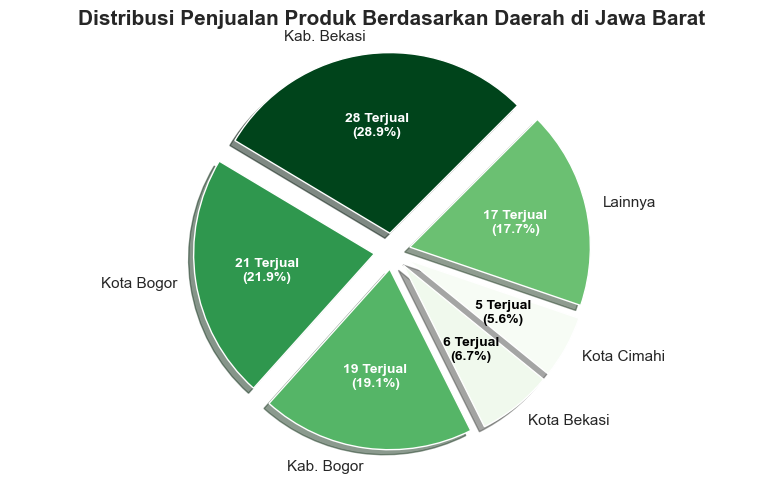

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan threshold
threshold_percentage = 5

# Filter data untuk provinsi Jawa Barat
jawa_barat_data = df[df['provinsi'] == 'Jawa Barat']

# Menghitung total produk terjual per daerah
sales_per_daerah = jawa_barat_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menghitung persentase penjualan
total_sales = sales_per_daerah.sum()
sales_percentage = (sales_per_daerah / total_sales) * 100

# Menentukan daerah yang di bawah threshold
small_daerahs = sales_percentage[sales_percentage < threshold_percentage]

# Menentukan daerah di atas threshold
top_daerahs = sales_percentage[sales_percentage >= threshold_percentage]

# Menghitung ulang persentase setelah penggabungan
if not small_daerahs.empty:
    top_daerahs['Lainnya'] = small_daerahs.sum()
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100
else:
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100

# Normalisasi warna
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Greens(norm(sales_percentage_updated))  # Mengubah ke warna hijau

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=45,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan title untuk pie chart
plt.title('Distribusi Penjualan Produk Berdasarkan Daerah di Jawa Barat', fontsize=15, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Jenis yang Terjual di Jawa Barat

Provinsi dengan penjualan terbanyak: Jawa Barat dengan jumlah produk terjual: 1300341


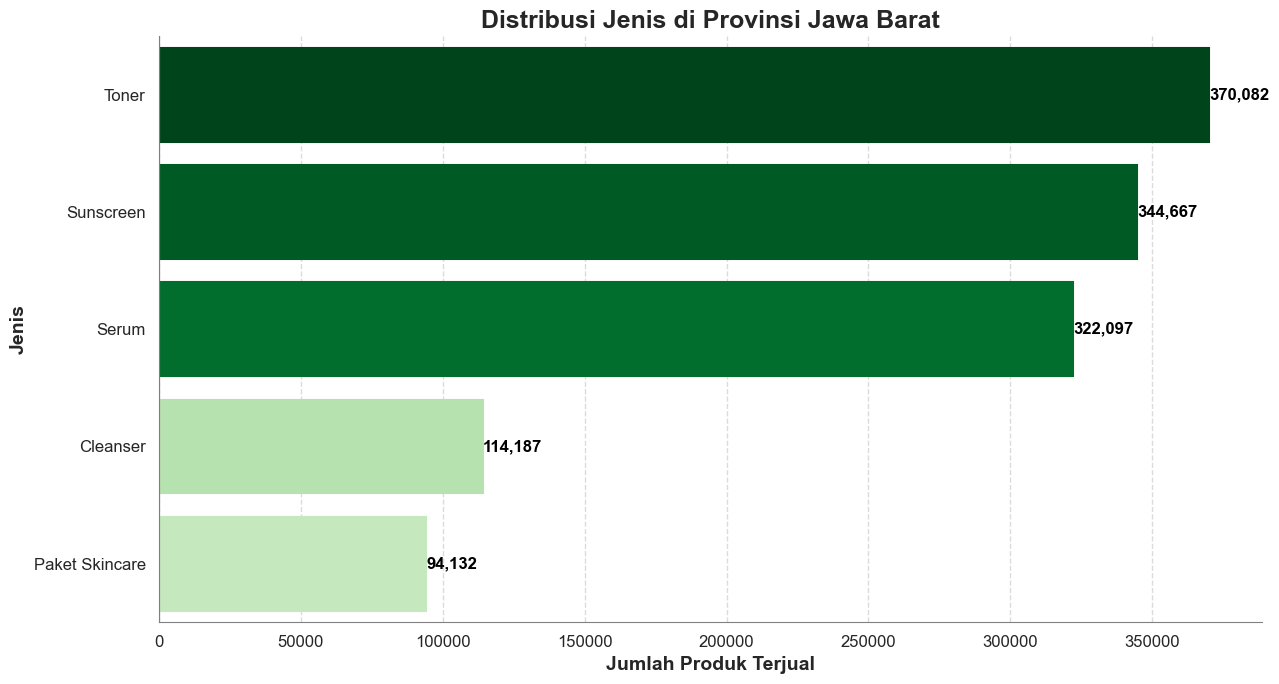

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total produk terjual per provinsi
sales_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi provinsi Jawa Barat
top_provinsi = 'Jawa Barat'
top_provinsi_sales = sales_per_provinsi.loc[top_provinsi]
print(f"Provinsi dengan penjualan terbanyak: {top_provinsi} dengan jumlah produk terjual: {top_provinsi_sales}")

# Filter data untuk Jawa Barat
top_provinsi_data = df[df['provinsi'] == top_provinsi]

# Total produk terjual berdasarkan jenis di Jawa Barat
top_5_jenis_provinsi = top_provinsi_data.groupby('jenis')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))
ax = sns.barplot(y=top_5_jenis_provinsi.index, x=top_5_jenis_provinsi.values, palette='Greens')  # Mengubah palette menjadi hijau

# Warna gradient dan garis tepi
for patch in ax.patches:
    color_value = patch.get_width() / top_5_jenis_provinsi.max()
    color = plt.cm.Greens(color_value)  # Menggunakan gradien warna hijau
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    patch.set_facecolor(color)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', 
                (width + 5, p.get_y() + p.get_height() / 2.),  # Pindahkan teks sedikit ke kanan
                ha='left', va='center', 
                fontsize=12, 
                color='black', 
                weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Jenis di Provinsi {top_provinsi}', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Jenis', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Filter data untuk provinsi Jawa Barat dan merek 'unknown'

In [48]:
# Mengambil data untuk produk dengan merek 'Unknown' di Jawa Barat
unknown_merek_jabar = df[(df['provinsi'] == 'Jawa Barat') & (df['jenis'] == 'Unknown')]
unknown_jabar_sorted = unknown_merek_jabar[['namaproduk', 'produkterjual']].sort_values(by='produkterjual', ascending=False)
unknown_jabar = unknown_jabar_sorted.head(20)
unknown_jabar

namaproduk  produkterjual
182                  garnier bright complete super mlml           1100
2449                               naturgo hanasui bpom            273
328   dr fay pudarkan flek hitam bekas jerawat resmi...            123
1458                                   talas bogor gram             46
4055                                         ranee care             18
2634                       charismalux anti gagal putih             17
2878                                 biore fresh bright              0
5297                                          cp strong              0
6190                                      parasol white              0

#### Distribusi Promo di Provinsi Jawa Barat

Provinsi dengan penjualan terbanyak: Jawa Barat dengan jumlah produk terjual: 1300341


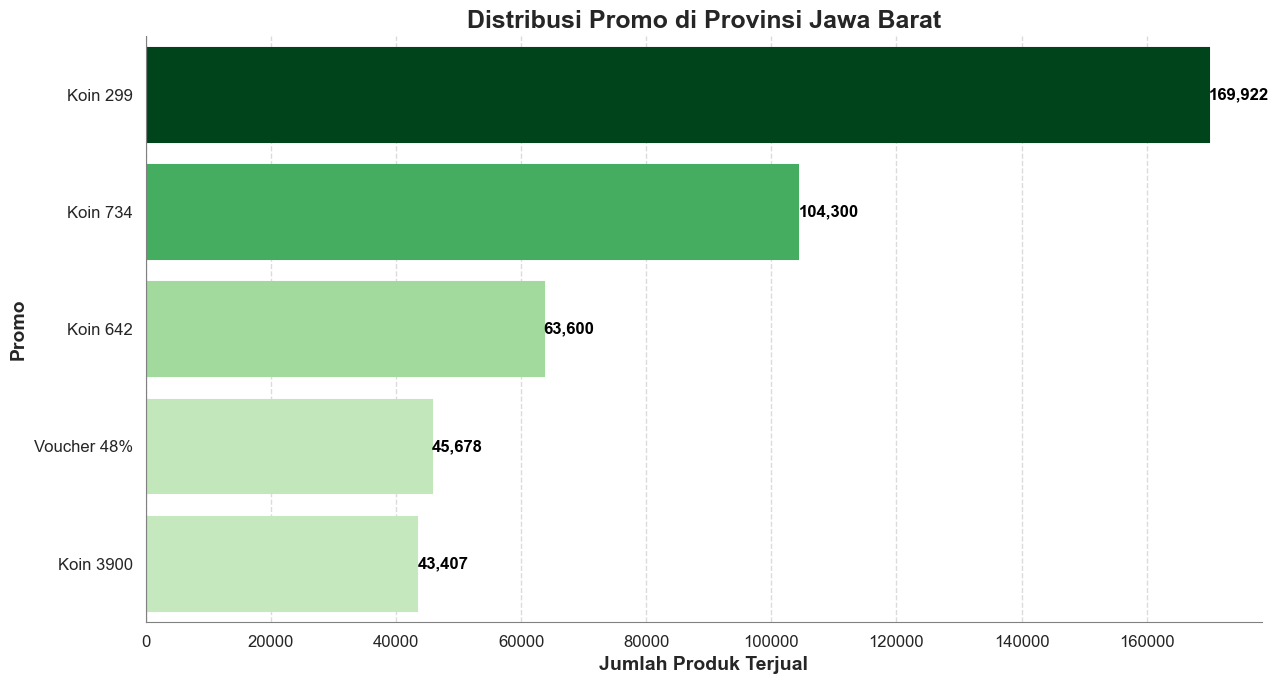

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total produk terjual per provinsi
sales_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi provinsi Jawa Barat
top_provinsi = 'Jawa Barat'
top_provinsi_sales = sales_per_provinsi.loc[top_provinsi]
print(f"Provinsi dengan penjualan terbanyak: {top_provinsi} dengan jumlah produk terjual: {top_provinsi_sales}")

# Filter data untuk Jawa Barat
top_provinsi_data = df[df['provinsi'] == top_provinsi]

# Total produk terjual berdasarkan promo di Jawa Barat
top_5_promo_provinsi = top_provinsi_data.groupby('promo')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))
ax = sns.barplot(y=top_5_promo_provinsi.index, x=top_5_promo_provinsi.values, palette='Greens')  # Mengubah palette menjadi hijau

# Warna gradient dan garis tepi
for patch in ax.patches:
    color_value = patch.get_width() / top_5_promo_provinsi.max()
    color = plt.cm.Greens(color_value)  # Menggunakan gradien warna hijau
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    patch.set_facecolor(color)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', 
                (width + 5, p.get_y() + p.get_height() / 2.),  # Pindahkan teks sedikit ke kanan
                ha='left', va='center', 
                fontsize=12, 
                color='black', 
                weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo di Provinsi {top_provinsi}', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Distribusi promo di daerah dengan penjualan terbanyak di provinsi Jawa Barat

Daerah dengan penjualan terbanyak di Jawa Barat: Kab. Bekasi dengan jumlah produk terjual: 376064


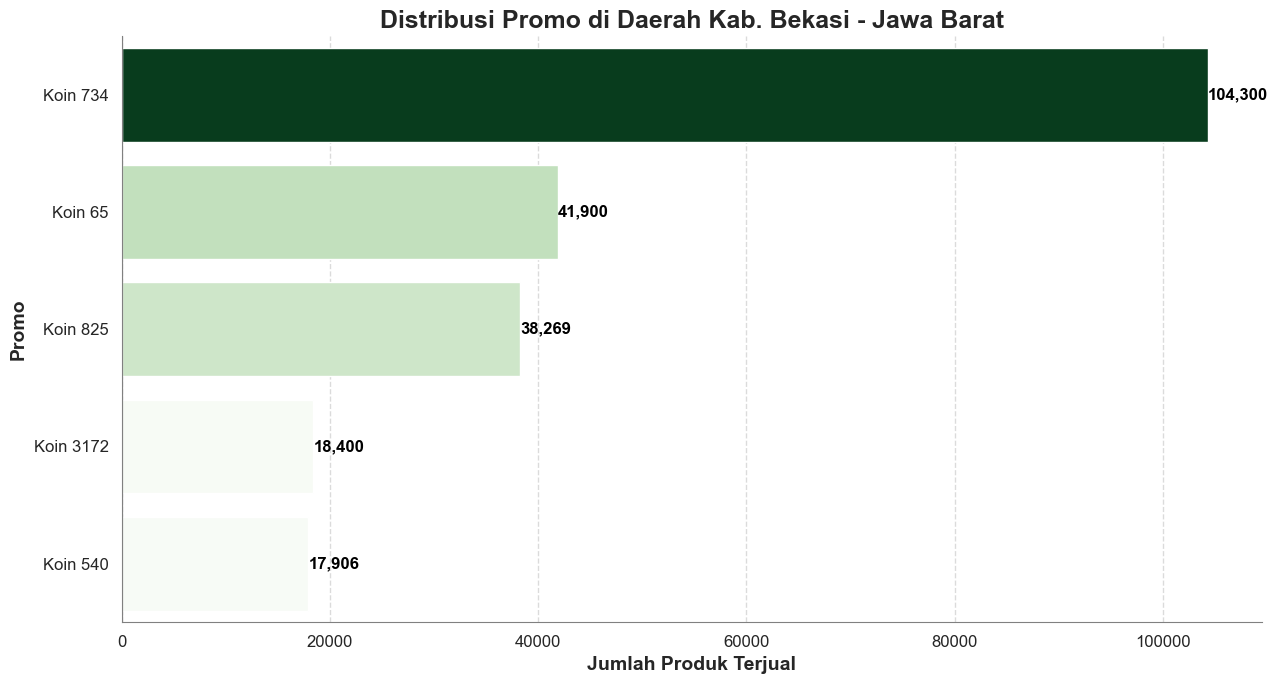

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi Jawa Barat
jabar_data = df[df['provinsi'] == 'Jawa Barat']

# Total produk terjual per daerah di Jawa Barat
sales_per_daerah_jabar = jabar_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi daerah dengan penjualan terbanyak di Jawa Barat
top_daerah_jabar = sales_per_daerah_jabar.index[0]
top_daerah_sales_jabar = sales_per_daerah_jabar.iloc[0]
print(f"Daerah dengan penjualan terbanyak di Jawa Barat: {top_daerah_jabar} dengan jumlah produk terjual: {top_daerah_sales_jabar}")

# Filter data untuk daerah dengan penjualan terbanyak di Jawa Barat
top_daerah_data_jabar = jabar_data[jabar_data['daerah'] == top_daerah_jabar]

# Total produk terjual berdasarkan promo di daerah dengan penjualan terbanyak di Jawa Barat
top_5_promo_jabar = top_daerah_data_jabar.groupby('promo')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))  # Ukuran figure disesuaikan untuk tampilan yang lebih baik

# Normalisasi warna berdasarkan nilai
norm = plt.Normalize(top_5_promo_jabar.min(), top_5_promo_jabar.max())
colors = plt.cm.Greens(norm(top_5_promo_jabar.values))  # Mengubah ke Greens

# Membuat barplot
ax = sns.barplot(y=top_5_promo_jabar.index, x=top_5_promo_jabar.values, palette=colors)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', 
                (width + 5, p.get_y() + p.get_height() / 2.),  # Geser keterangan ke kanan
                ha='left', va='center', fontsize=12, color='black', weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo di Daerah {top_daerah_jabar} - Jawa Barat', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Rata rata Harga di 5 Daerah Teratas di Provinsi Jawa Barat

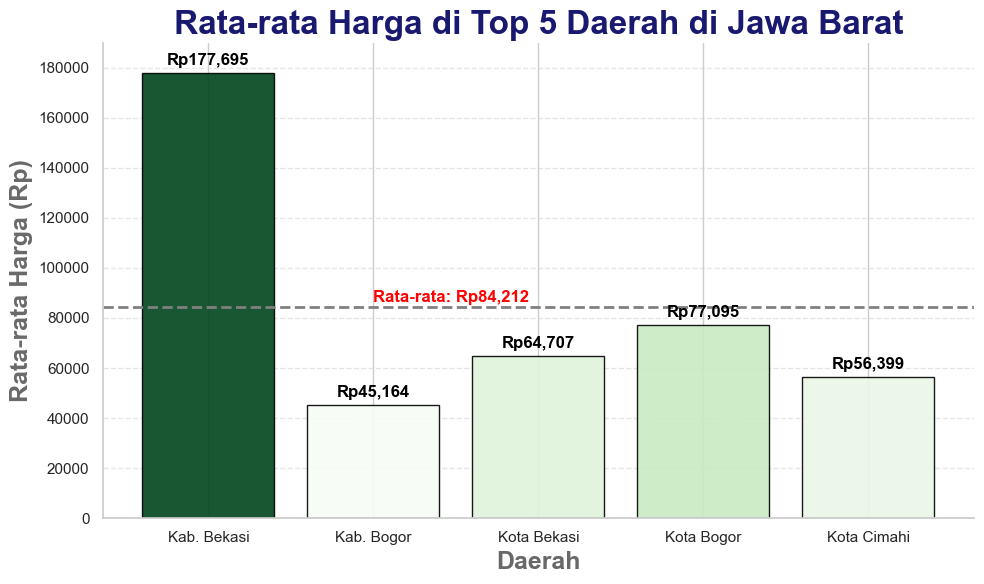

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data untuk provinsi Jawa Barat
df_jabar = df[df['provinsi'] == 'Jawa Barat']

# Menghitung total produk terjual per daerah di Jawa Barat
total_terjual_per_daerah = df_jabar.groupby('daerah')['produkterjual'].sum().reset_index()

# Memilih 5 daerah teratas di Jawa Barat berdasarkan produk terjual terbanyak
top_5_daerah_jabar = total_terjual_per_daerah.nlargest(5, 'produkterjual')

# Filter data untuk 5 daerah teratas di Jawa Barat
df_top_5_daerah_jabar = df_jabar[df_jabar['daerah'].isin(top_5_daerah_jabar['daerah'])]

# Menghitung rata-rata harga per daerah di 5 daerah teratas
avg_harga_top_5_jabar = df_top_5_daerah_jabar.groupby('daerah')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5_jabar = avg_harga_top_5_jabar.merge(top_5_daerah_jabar, on='daerah')

# Membuat gradien warna berdasarkan harga (hijau)
norm = plt.Normalize(avg_harga_top_5_jabar['harga'].min(), avg_harga_top_5_jabar['harga'].max())
colors = plt.cm.Greens(norm(avg_harga_top_5_jabar['harga']))  # Mengubah ke Greens

# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Grafik: Rata-rata Harga di Top 5 Daerah di Jawa Barat
barplot = plt.bar(avg_harga_top_5_jabar['daerah'], avg_harga_top_5_jabar['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga di Top 5 Daerah di Jawa Barat', fontsize=24, weight='bold', color='midnightblue')
plt.xlabel('Daerah', fontsize=18, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=18, weight='bold', color='dimgray')

# Mengatur batas sumbu Y
plt.ylim(0, 190000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 190001, 20000))  # Set interval setiap 20.000

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5_jabar['harga'].mean()
plt.axhline(mean_value, color='grey', linestyle='--', linewidth=2)
plt.text(1, mean_value + 2000, f'Rata-rata: Rp{mean_value:,.0f}', color='red', fontsize=12, fontweight='bold')

# Mengatur gaya grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menghilangkan spines untuk tampilan yang lebih bersih
ax = plt.gca()  # Ambil objek Axes saat ini
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('white')  # Menghilangkan latar belakang

# Menampilkan plot
plt.tight_layout()
plt.show()

### Jawa Timur

#### Distribusi Penjualan Produk Berdasarkan Daerah di Jawa Timur

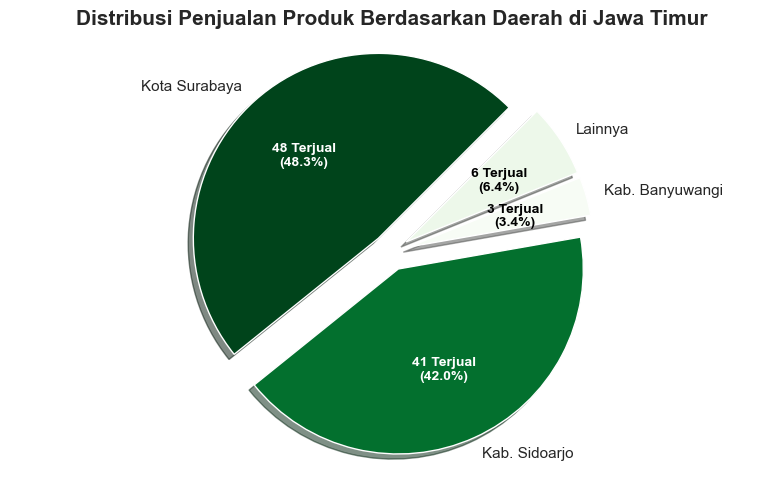

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan threshold
threshold_percentage = 2

# Filter data untuk provinsi Jawa Timur
jawa_timur_data = df[df['provinsi'] == 'Jawa Timur']

# Menghitung total produk terjual per daerah
sales_per_daerah = jawa_timur_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menghitung persentase penjualan
total_sales = sales_per_daerah.sum()
sales_percentage = (sales_per_daerah / total_sales) * 100

# Menentukan daerah yang di bawah threshold
small_daerahs = sales_percentage[sales_percentage < threshold_percentage]

# Menentukan daerah di atas threshold
top_daerahs = sales_percentage[sales_percentage >= threshold_percentage]

# Menghitung ulang persentase setelah penggabungan
if not small_daerahs.empty:
    top_daerahs['Lainnya'] = small_daerahs.sum()
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100
else:
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100

# Normalisasi warna
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Greens(norm(sales_percentage_updated))  # Mengubah ke palet warna hijau

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=45,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan title untuk pie chart
plt.title('Distribusi Penjualan Produk Berdasarkan Daerah di Jawa Timur', fontsize=15, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Jenis yang Terjual di Jawa Timur

Provinsi dengan penjualan terbanyak: Jawa Timur dengan jumlah produk terjual: 546001


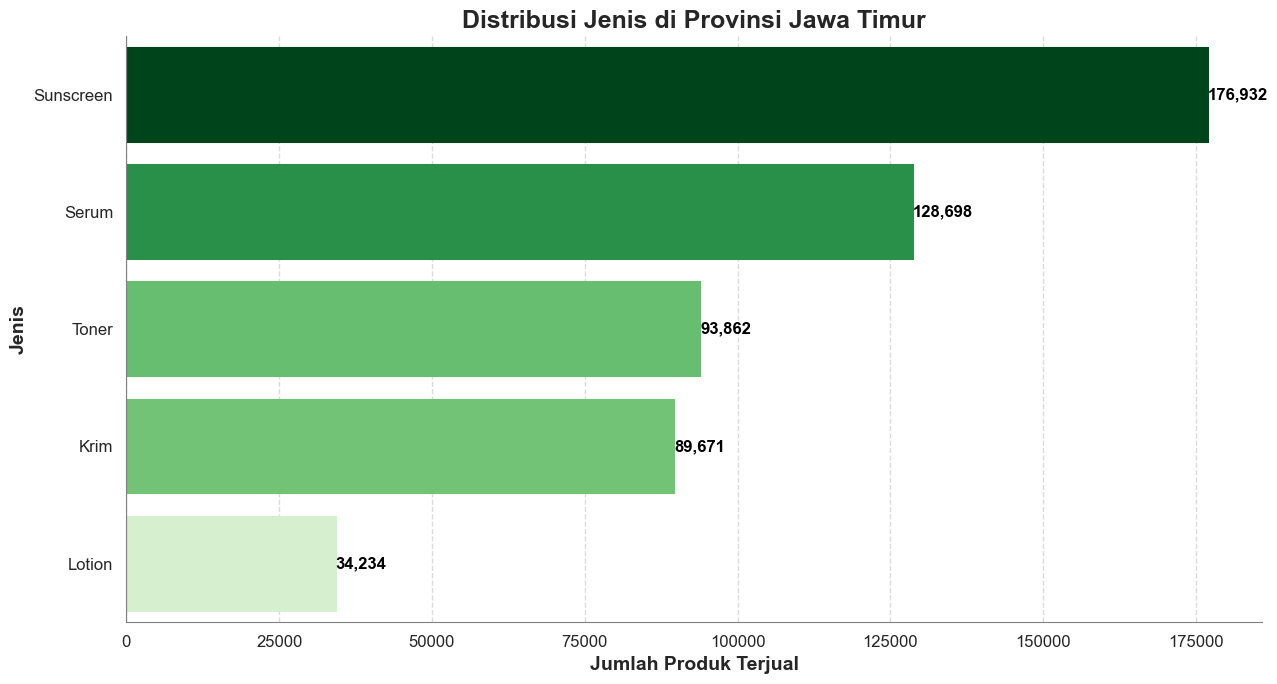

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total produk terjual per provinsi
sales_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi provinsi Jawa Timur
top_provinsi = 'Jawa Timur'
top_provinsi_sales = sales_per_provinsi.loc[top_provinsi]
print(f"Provinsi dengan penjualan terbanyak: {top_provinsi} dengan jumlah produk terjual: {top_provinsi_sales}")

# Filter data untuk Jawa Timur
top_provinsi_data = df[df['provinsi'] == top_provinsi]

# Total produk terjual berdasarkan jenis di Jawa Timur
top_5_jenis_provinsi = top_provinsi_data.groupby('jenis')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))

# Menggunakan palet warna hijau
ax = sns.barplot(y=top_5_jenis_provinsi.index, x=top_5_jenis_provinsi.values, palette='Greens')

# Warna gradient dan garis tepi
for patch in ax.patches:
    color_value = patch.get_width() / top_5_jenis_provinsi.max()
    color = plt.cm.Greens(color_value)  # Menggunakan palet hijau
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    patch.set_facecolor(color)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', 
                (width + 5, p.get_y() + p.get_height() / 2.),  # Pindahkan teks sedikit ke kanan
                ha='left', va='center', 
                fontsize=12, 
                color='black', 
                weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Jenis di Provinsi {top_provinsi}', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Jenis', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Filter data untuk provinsi Jawa Timur dan merek 'unknown'

In [54]:
# Mengambil data untuk produk dengan merek 'Unknown' di Jawa Timur
unknown_merek_jatim = df[(df['provinsi'] == 'Jawa Timur') & (df['jenis'] == 'Unknown')]
unknown_jatim_sorted = unknown_merek_jatim[['namaproduk', 'produkterjual']].sort_values(by='produkterjual', ascending=False)
unknown_jatim = unknown_jatim_sorted.head(20)
unknown_jatim

namaproduk  produkterjual
8185            la tulipe total protection             39
6574  madame gie protect me with calendula             24
4635                         wardah shield             20
5829  la tulipe whiteness total protection              7
4764                      citra fresh glow              0
5553             latulipe total protection              0
6483               banana boat sport ultra              0

#### Distribusi Promo di Provinsi Jawa Timur

Provinsi dengan penjualan terbanyak: Jawa Timur dengan jumlah produk terjual: 546001


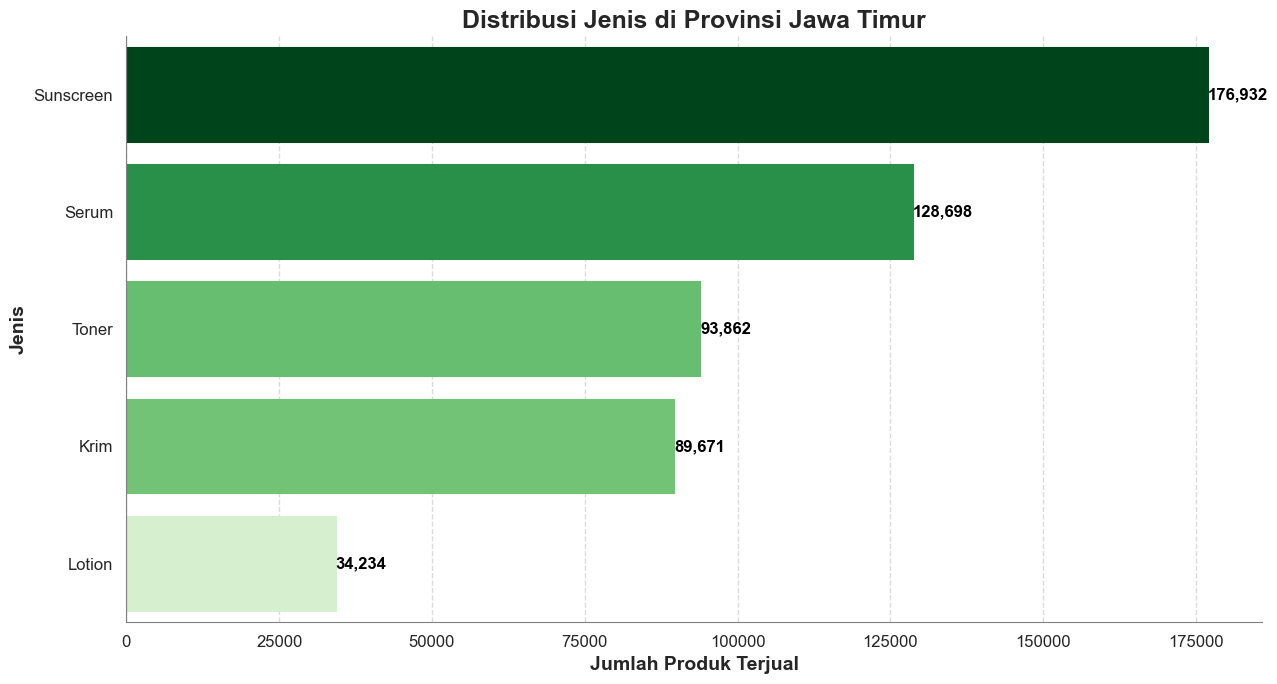

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total produk terjual per provinsi
sales_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi provinsi Jawa Timur
top_provinsi = 'Jawa Timur'
top_provinsi_sales = sales_per_provinsi.loc[top_provinsi]
print(f"Provinsi dengan penjualan terbanyak: {top_provinsi} dengan jumlah produk terjual: {top_provinsi_sales}")

# Filter data untuk Jawa Timur
top_provinsi_data = df[df['provinsi'] == top_provinsi]

# Total produk terjual berdasarkan jenis di Jawa Timur
top_5_jenis_provinsi = top_provinsi_data.groupby('jenis')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))

# Menggunakan palet warna hijau
ax = sns.barplot(y=top_5_jenis_provinsi.index, x=top_5_jenis_provinsi.values, palette='Greens')

# Warna gradient dan garis tepi
for patch in ax.patches:
    color_value = patch.get_width() / top_5_jenis_provinsi.max()
    color = plt.cm.Greens(color_value)  # Menggunakan palet hijau
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    patch.set_facecolor(color)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', 
                (width + 5, p.get_y() + p.get_height() / 2.),  # Pindahkan teks sedikit ke kanan
                ha='left', va='center', 
                fontsize=12, 
                color='black', 
                weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Jenis di Provinsi {top_provinsi}', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Jenis', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Distribusi promo di daerah dengan penjualan terbanyak di provinsi Jawa Timur

Daerah dengan penjualan terbanyak di Jawa Timur: Kota Surabaya dengan jumlah produk terjual: 263635


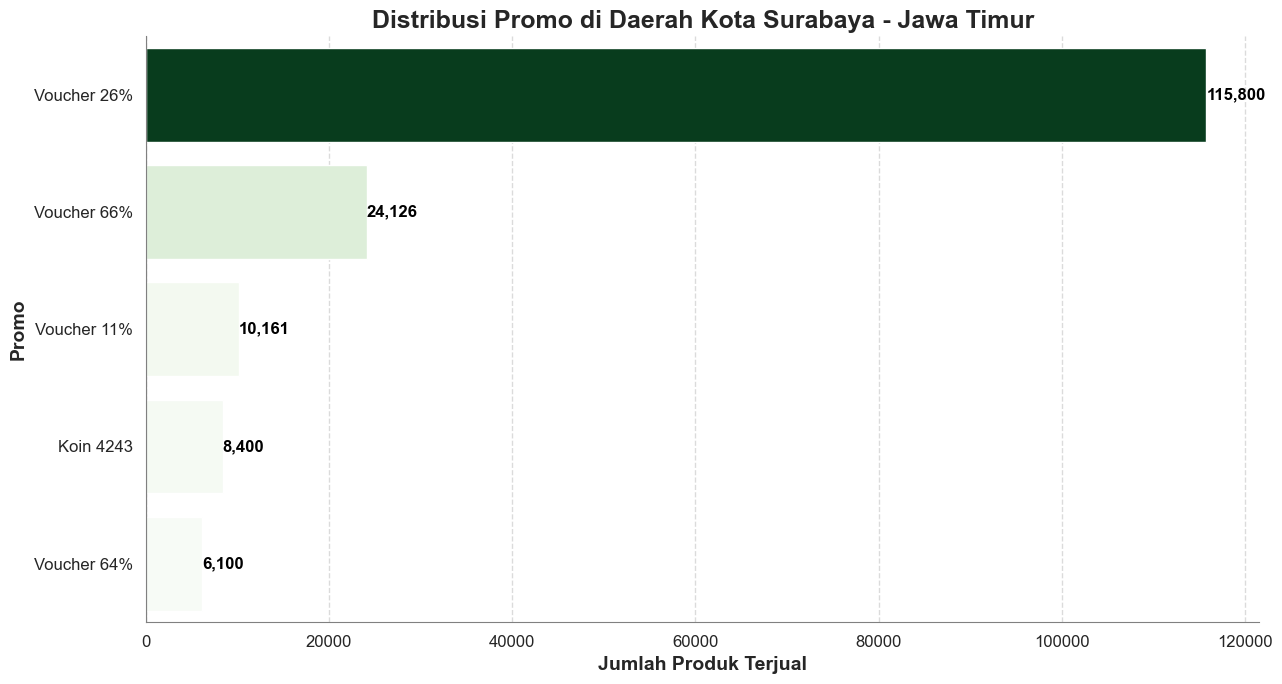

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi Jawa Timur
jatim_data = df[df['provinsi'] == 'Jawa Timur']

# Total produk terjual per daerah di Jawa Timur
sales_per_daerah_jatim = jatim_data.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Identifikasi daerah dengan penjualan terbanyak di Jawa Timur
top_daerah_jatim = sales_per_daerah_jatim.index[0]
top_daerah_sales_jatim = sales_per_daerah_jatim.iloc[0]
print(f"Daerah dengan penjualan terbanyak di Jawa Timur: {top_daerah_jatim} dengan jumlah produk terjual: {top_daerah_sales_jatim}")

# Filter data untuk daerah dengan penjualan terbanyak di Jawa Timur
top_daerah_data_jatim = jatim_data[jatim_data['daerah'] == top_daerah_jatim]

# Total produk terjual berdasarkan promo di daerah dengan penjualan terbanyak di Jawa Timur
top_5_promo_jatim = top_daerah_data_jatim.groupby('promo')['produkterjual'].sum().nlargest(5)

# Setup plot
plt.figure(figsize=(13, 7))  # Ukuran figure disesuaikan untuk tampilan yang lebih baik

# Normalisasi warna berdasarkan nilai
norm = plt.Normalize(top_5_promo_jatim.min(), top_5_promo_jatim.max())
colors = plt.cm.Greens(norm(top_5_promo_jatim.values))  # Ubah colormap menjadi Greens

# Membuat barplot
ax = sns.barplot(y=top_5_promo_jatim.index, x=top_5_promo_jatim.values, palette=colors)

# Tambahkan anotasi untuk jumlah produk terjual
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}', (width + 5, p.get_y() + p.get_height() / 2.),  # Geser keterangan ke kanan
                ha='left', va='center', fontsize=12, color='black', weight='bold')

# Judul dan label sumbu
plt.title(f'Distribusi Promo di Daerah {top_daerah_jatim} - Jawa Timur', fontsize=18, weight='bold')
plt.xlabel('Jumlah Produk Terjual', fontsize=14, weight='bold')
plt.ylabel('Promo', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan garis grid dan garis vertikal pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linewidth=0.8)
sns.set(style='whitegrid')

# Menambahkan border pada figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['bottom'].set_linewidth(0.8)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

#### Rata rata Harga di 5 Daerah Teratas di Provinsi Jawa Timur

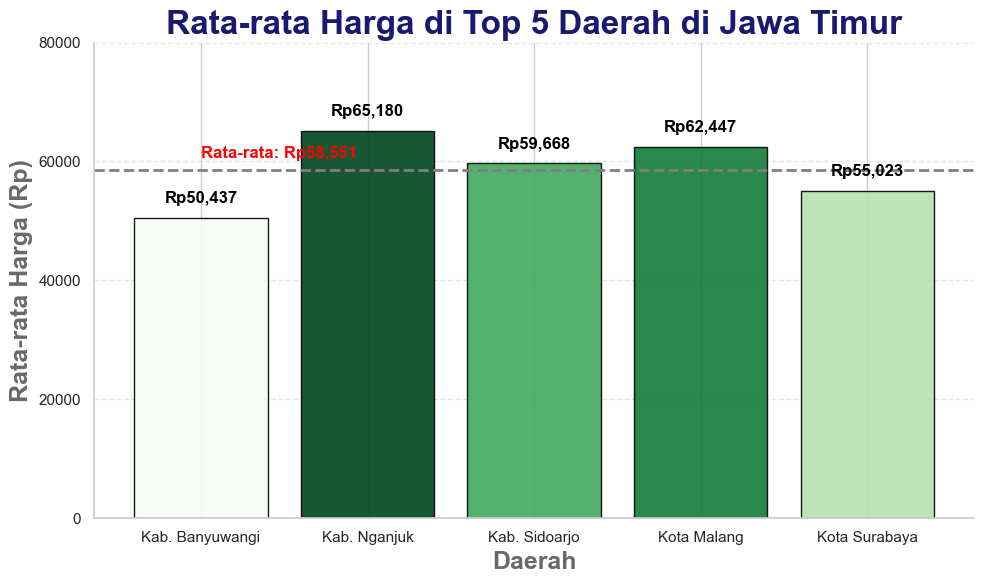

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter data untuk provinsi Jawa Timur
df_jatim = df[df['provinsi'] == 'Jawa Timur']

# Menghitung total produk terjual per daerah di Jawa Timur
total_terjual_per_daerah = df_jatim.groupby('daerah')['produkterjual'].sum().reset_index()

# Memilih 5 daerah teratas di Jawa Timur berdasarkan produk terjual terbanyak
top_5_daerah_jatim = total_terjual_per_daerah.nlargest(5, 'produkterjual')

# Filter data untuk 5 daerah teratas di Jawa Timur
df_top_5_daerah_jatim = df_jatim[df_jatim['daerah'].isin(top_5_daerah_jatim['daerah'])]

# Menghitung rata-rata harga per daerah di 5 daerah teratas
avg_harga_top_5_jatim = df_top_5_daerah_jatim.groupby('daerah')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5_jatim = avg_harga_top_5_jatim.merge(top_5_daerah_jatim, on='daerah')

# Membuat gradien warna hijau (gelap untuk nilai tinggi, terang untuk nilai rendah)
norm = plt.Normalize(avg_harga_top_5_jatim['harga'].min(), avg_harga_top_5_jatim['harga'].max())
colors = plt.cm.Greens(norm(avg_harga_top_5_jatim['harga']))  # Gunakan colormap Greens

# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Grafik: Rata-rata Harga di Top 5 Daerah di Jawa Timur
barplot = plt.bar(avg_harga_top_5_jatim['daerah'], avg_harga_top_5_jatim['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga di Top 5 Daerah di Jawa Timur', fontsize=24, weight='bold', color='midnightblue')
plt.xlabel('Daerah', fontsize=18, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=18, weight='bold', color='dimgray')

# Mengatur batas sumbu Y
plt.ylim(0, 80000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 80001, 20000))  # Set interval setiap 20.000

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5_jatim['harga'].mean()
plt.axhline(mean_value, color='grey', linestyle='--', linewidth=2)
plt.text(0, mean_value + 2000, f'Rata-rata: Rp{mean_value:,.0f}', color='red', fontsize=12, fontweight='bold')

# Mengatur gaya grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menghilangkan spines untuk tampilan yang lebih bersih
ax = plt.gca()  # Ambil objek Axes saat ini
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('white')  # Menghilangkan latar belakang

# Menampilkan plot
plt.tight_layout()
plt.show()

## Melakukan Perubahan pada kolom Promo

In [58]:
# Fungsi untuk mengambil nilai koin dari kolom promo
def extract_cashback_koin(promo):
    match = re.search(r'Koin (\d+)', promo)  # Cari pola 'Koin XXX' dengan angka
    if match:
        return int(match.group(1))  # Jika cocok, kembalikan angka
    return 0  # Jika tidak ada 'Koin XXX', kembalikan 0

# Fungsi untuk mengambil nilai voucher dari kolom promo
def extract_voucher(promo):
    match = re.search(r'Voucher (\d+)%', promo)  # Cari pola 'Voucher XX%' dengan angka
    if match:
        return int(match.group(1))  # Jika cocok, kembalikan angka
    return 0  
df['cashbackkoin'] = df['promo'].apply(extract_cashback_koin)
df['voucher(%)'] = df['promo'].apply(extract_voucher)
df.head()

namaproduk  harga  produkterjual  \
0                                   onlyou sunscreen  52500            200   
1                 daily brightener asderma aesthetic  59000            187   
2  biore aqua rich sunscreen watery essence water...  19900            500   
3  hh sunscreen lightening pink defender sunscree...  64999          11100   
4                    toner super strong flek glowing  14900          39800   

   jumlahpenilaian        promo                daerah  \
0               43    Tidak Ada    Kota Jakarta Barat   
1               75    Koin 1770    Kota Jakarta Utara   
2              193  Voucher 50%           Kab. Bekasi   
3             4495    Koin 3900  Kota Jakarta Selatan   
4             4400     Koin 447           Kota Bekasi   

                                          linkproduk           jenis  \
0  https://www.lazada.co.id/products/onlyou-sunsc...       Sunscreen   
1  https://www.lazada.co.id/products/daily-bright...  Paket Skincare   
2  https://www.lazada.co.id/products/biore-uv-aqu...       Sunscreen   
3  https://www.lazada.co.id/products/hh-sunscreen...       Sunscreen   
4  https://www.lazada.co.id/products/toner-super-...           Toner   

      provinsi  cashbackkoin  voucher(%)  
0  DKI Jakarta             0           0  
1  DKI Jakarta          1770           0  
2   Jawa Barat             0          50  
3  DKI Jakarta          3900           0  
4   Jawa Barat           447           0

## Menyimpan data